In [32]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from cleaning_module  import  *
from all_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal, bernoulli
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
from sklearn.linear_model import BayesianRidge



data_name = 'Insurance.csv'
data = clean_data(data_name, method= 'fill_mean' )
print('-------------------------------------------------------------------')
print(data.head(5))
print('\n-------------------------------------------------------------------\n')

print(data.info())

# Dropping Station column from dataset because it is not useful in data
data = data.drop(columns=[])

print(data.info())

print('\n------------------------------------------------------------------\n')
print(data.columns)
data.head()

Data loaded successfully.
Duplicates removed: 1
Missing values filled with mean.
Cleaned data saved to cleaned_data.csv
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
-------------------------------------------------------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

-------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null 

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

 Skewness & Kurtosis of features:
age                  | Skew: 0.05 | Kurtosis: -1.24


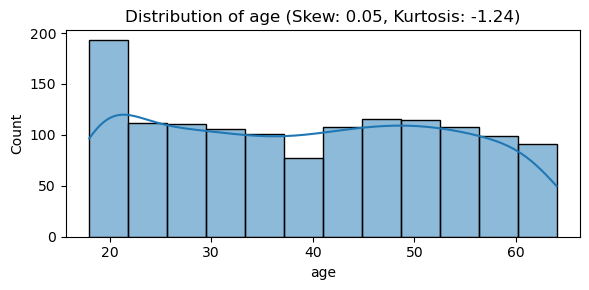

bmi                  | Skew: 0.28 | Kurtosis: -0.06


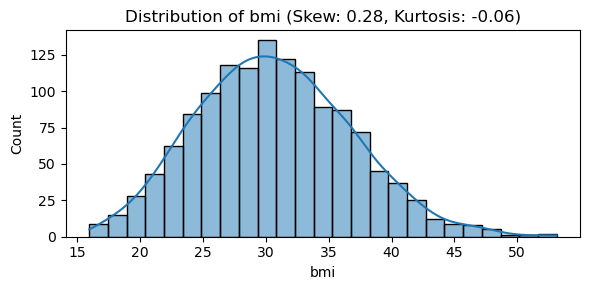

children             | Skew: 0.94 | Kurtosis: 0.20


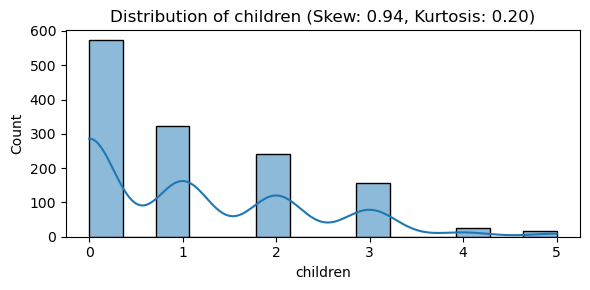

sex_male             | Skew: -0.02 | Kurtosis: -2.00


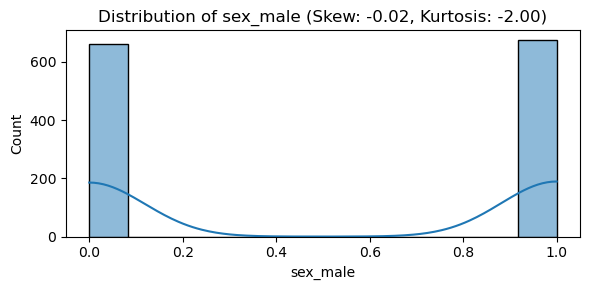

smoker_yes           | Skew: 1.46 | Kurtosis: 0.14


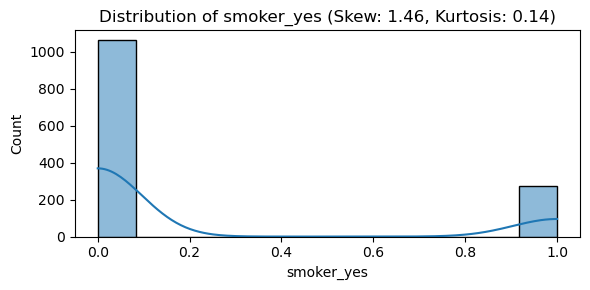

region_northwest     | Skew: 1.20 | Kurtosis: -0.55


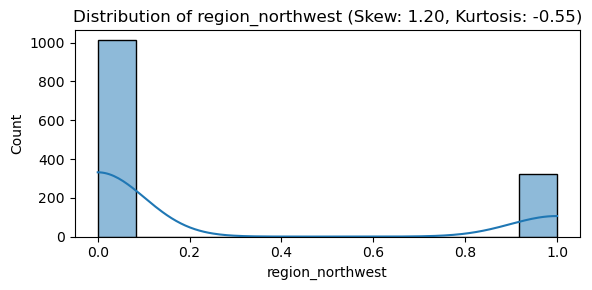

region_southeast     | Skew: 1.02 | Kurtosis: -0.95


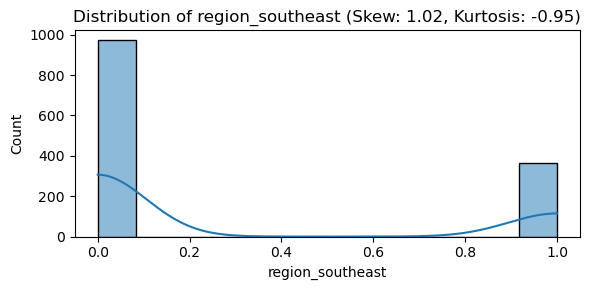

region_southwest     | Skew: 1.20 | Kurtosis: -0.57


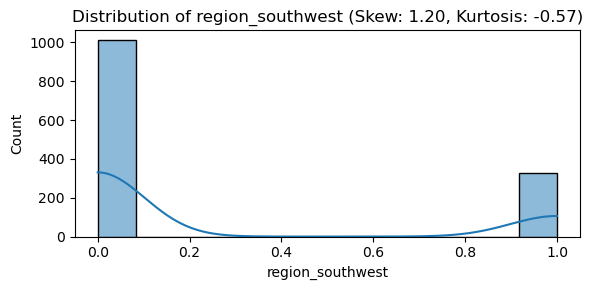


 Relationship with Target (charges):


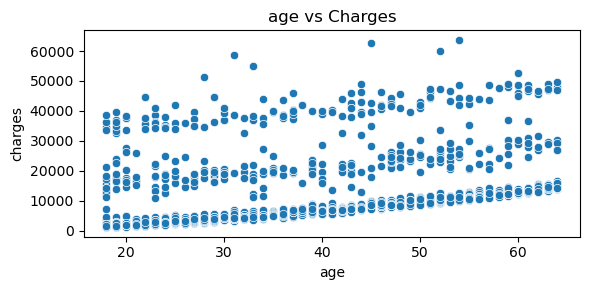

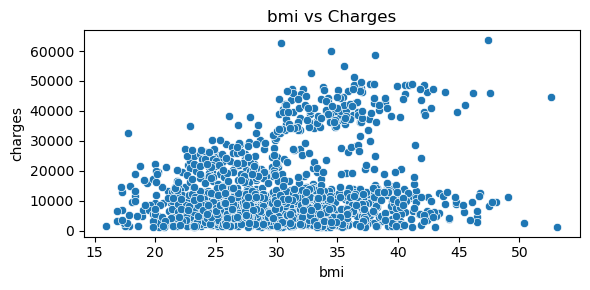

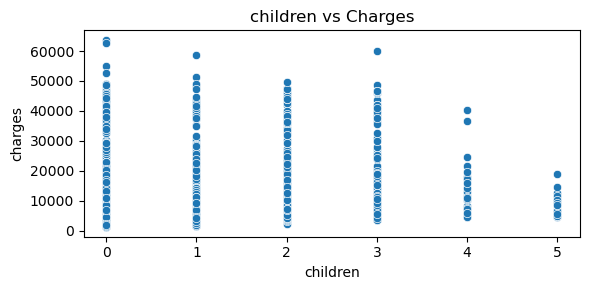

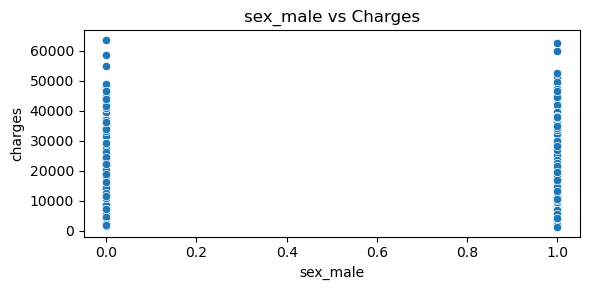

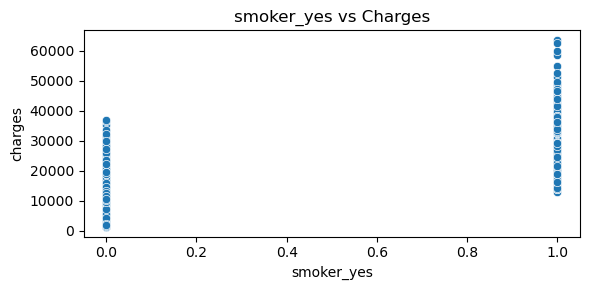

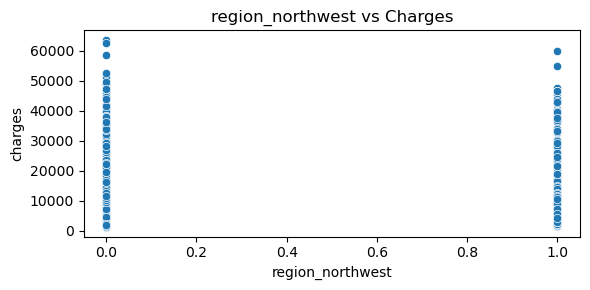

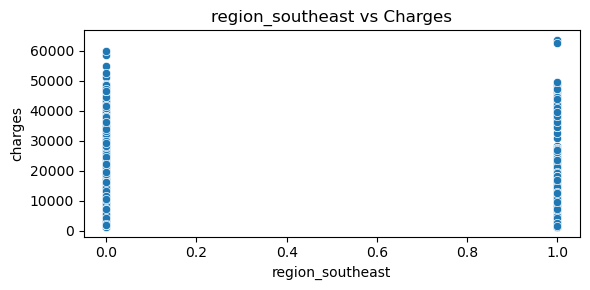

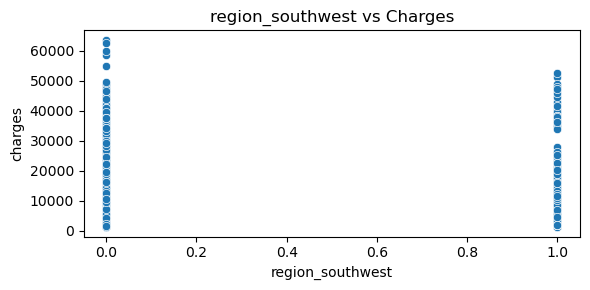

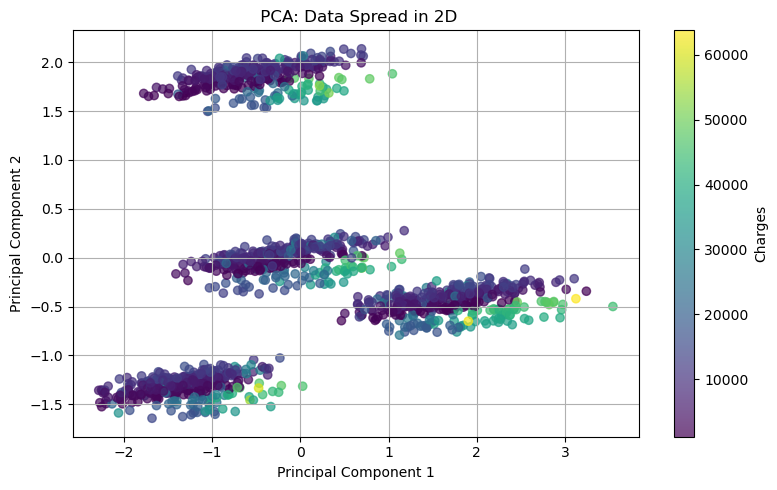

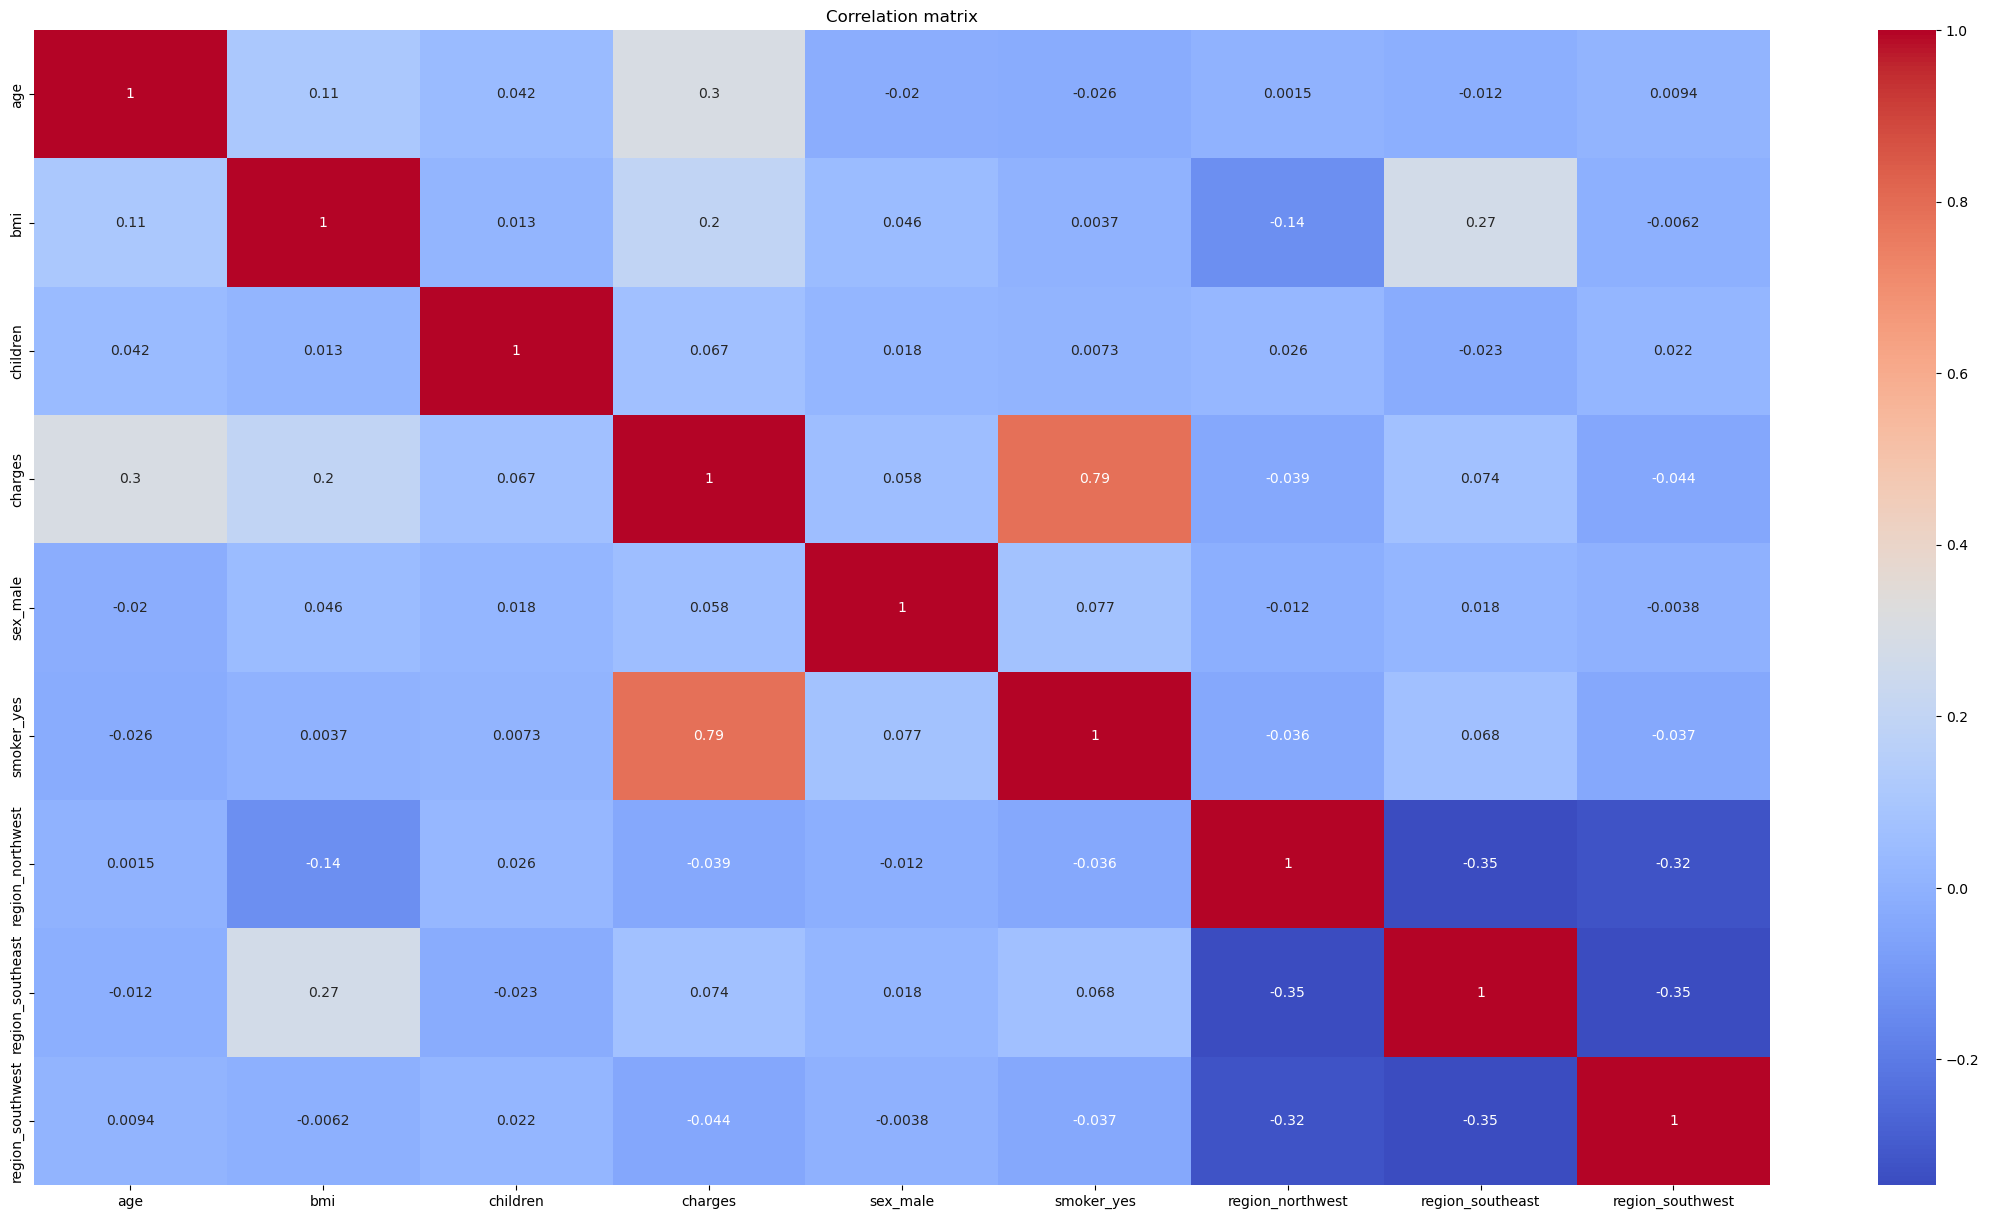

In [36]:
data = pd.read_csv('cleaned_data.csv')
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
bool_col = data.select_dtypes(include='bool').columns
data[bool_col] = data[bool_col].astype(int)


# Features & Target
X = data.drop('charges', axis=1)
y = data['charges']

data_plot(data, X, y)

selected_features = ['age', 'smoker_yes', 'bmi', 'region_southeast' , 'children' , 'sex_male' , 'region_northwest' , 'region_southwest' ]
X = data[selected_features].values
y = data['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




--- Train Evaluation ---


Residual Standard Error (RSE): 6106.868334572685
R-squared: 0.7299057809339075
Correlation between actual and predicted: 0.85434523521461
R-squared vs. Correlation squared: 0.7299057809339075 vs 0.7299057809339073
H1: F-statistic = 358.06955183323265 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 6058.947734426037
R-squared: 0.8069287081198009
Correlation between actual and predicted: 0.9064671043724966
R-squared vs. Correlation squared: 0.8069287081198009 vs 0.8216826113094585


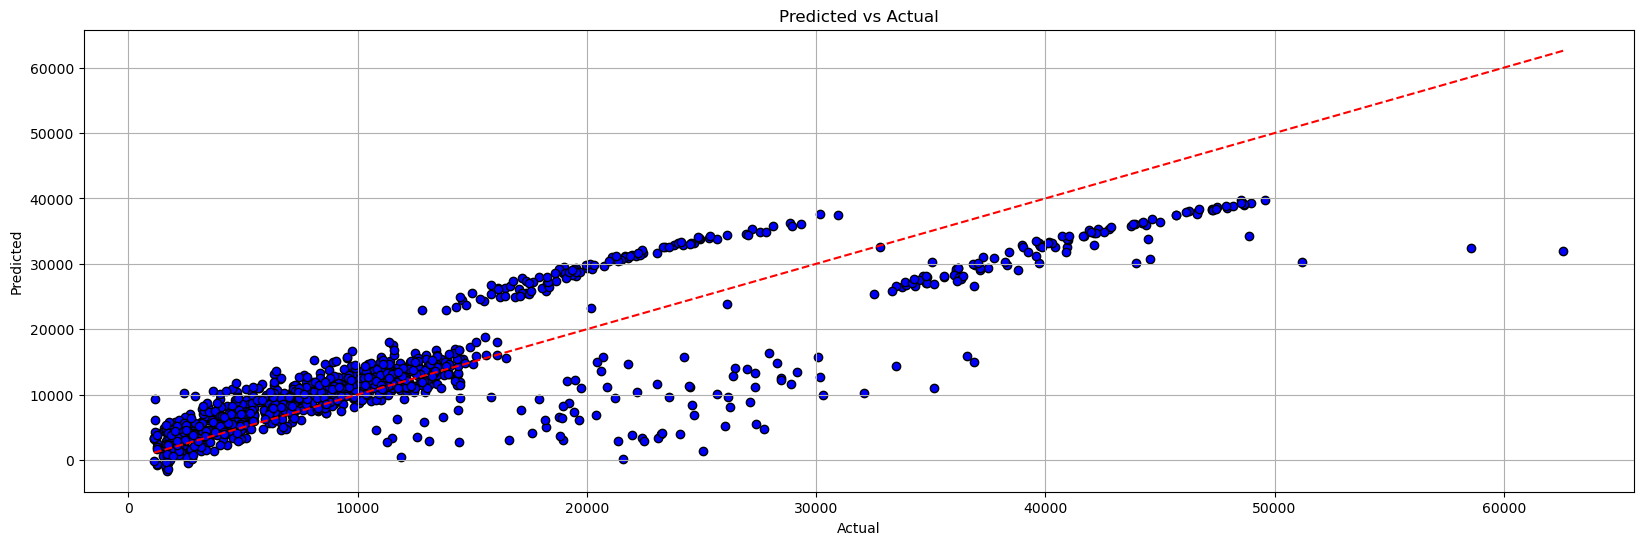

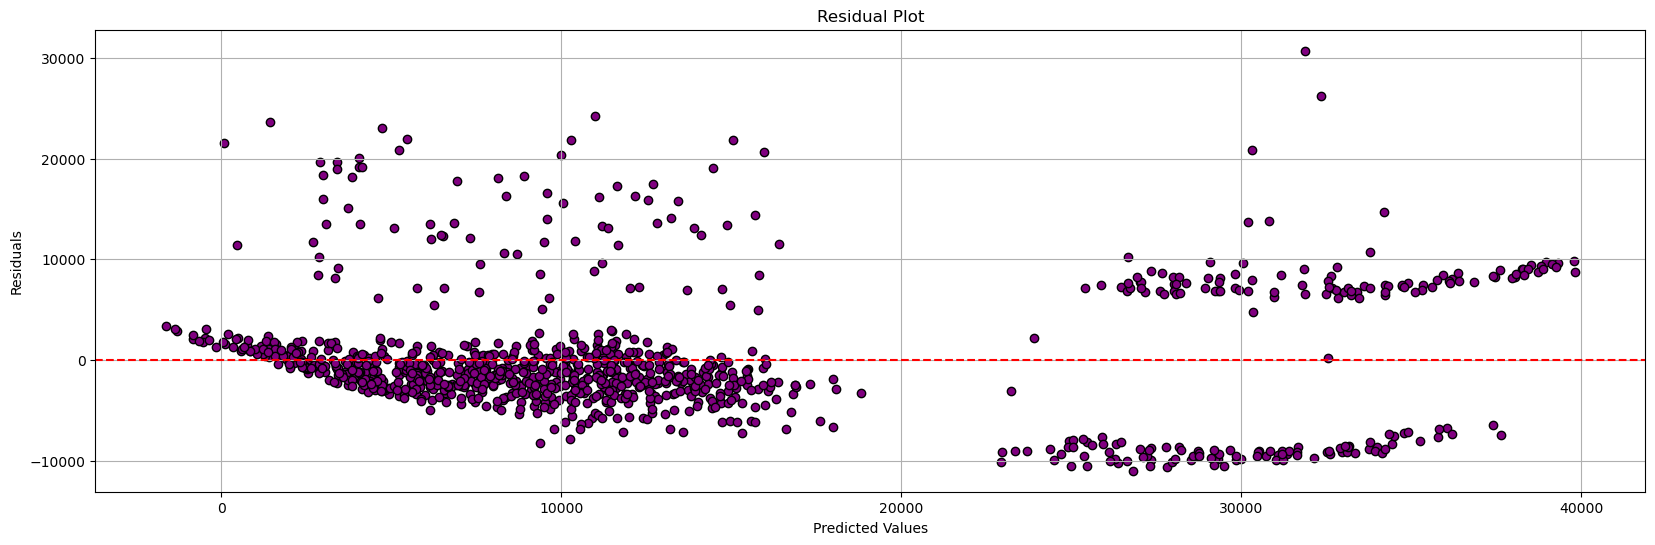

In [ ]:
traina_result = run_multiple_linear_regression(X_train, y_train,X_test, y_test, feature_names=selected_features)



--- Training Results (Bayesian Linear Regression) ---
Train MSE: 40437319.6386
Train R² : 0.7047


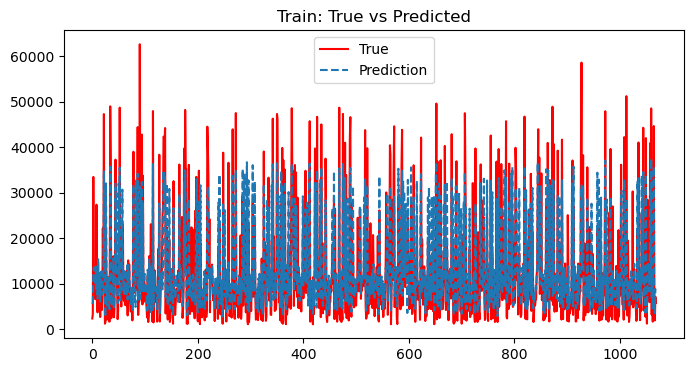


--- Testing Results (Bayesian Linear Regression) ---
Test MSE : 41737799.7773
Test R²  : 0.7729


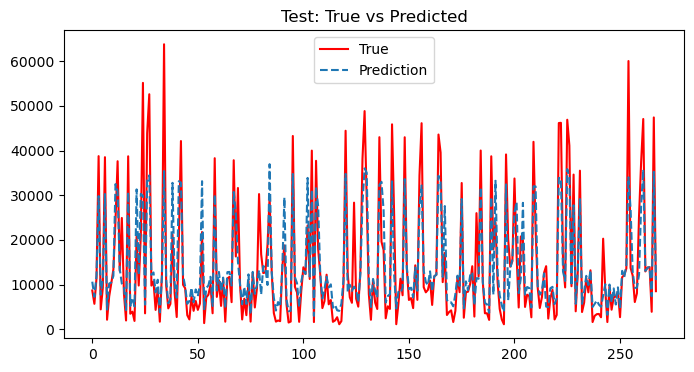

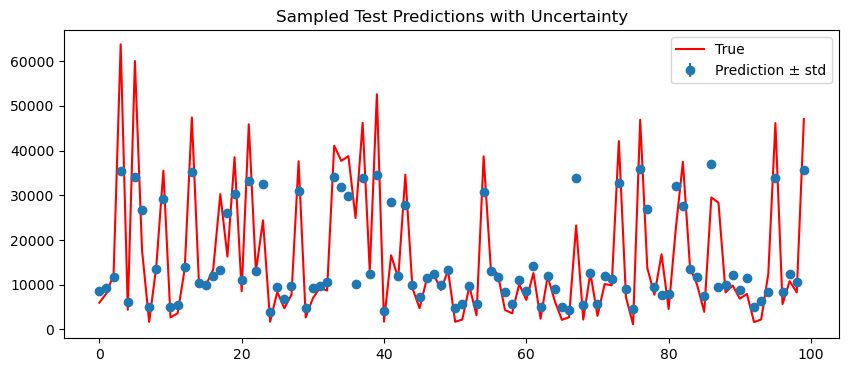

In [38]:
# 1. Train model
mu_post, Sigma_post = train_bayesian_linear_regression(X_train, y_train)
# 2. Evaluate on test data
test_bayesian_linear_regression(X_test, y_test, mu_post, Sigma_post)


The best lambda is : 11.9646
Final training MSE is : 36992853.1426

Train R^2 : 0.7298
Train MSE : 36992853.1426
Adjusted R^2 is : 0.7278
AIC is : 18644.6455
BIC is : 18684.4414
 Test R2: 0.8046
 Test MSE: 35899528.3255


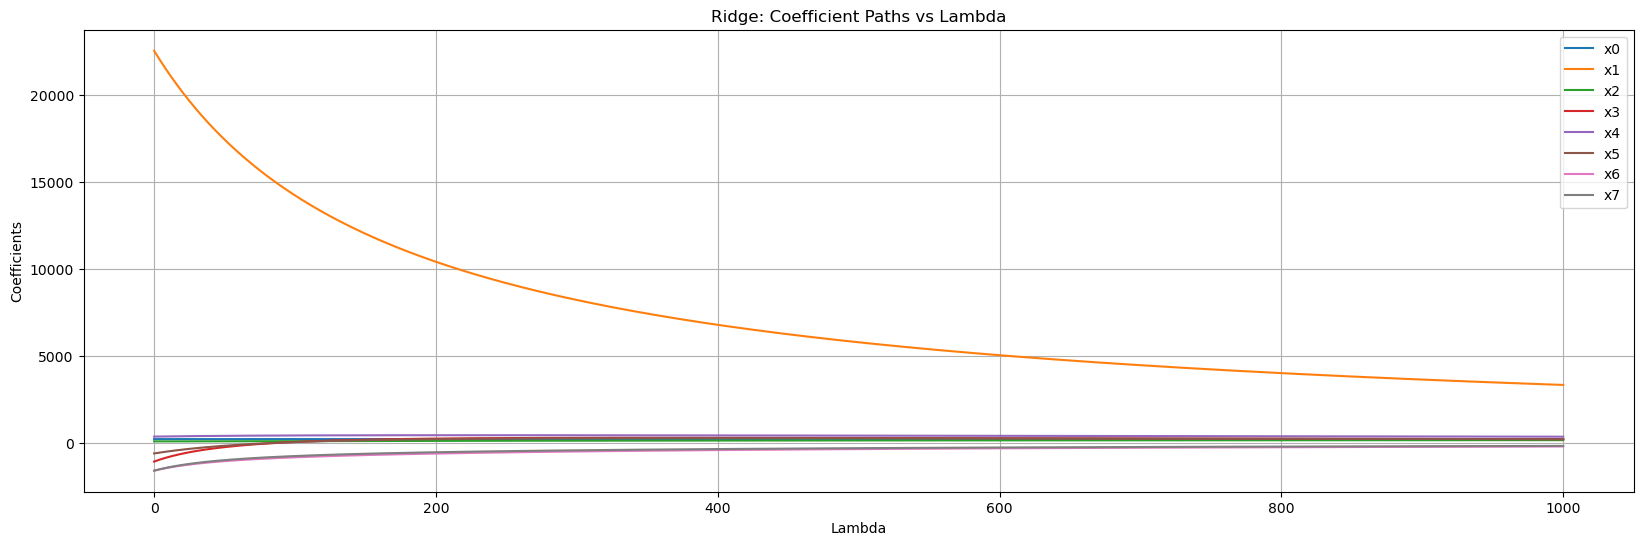

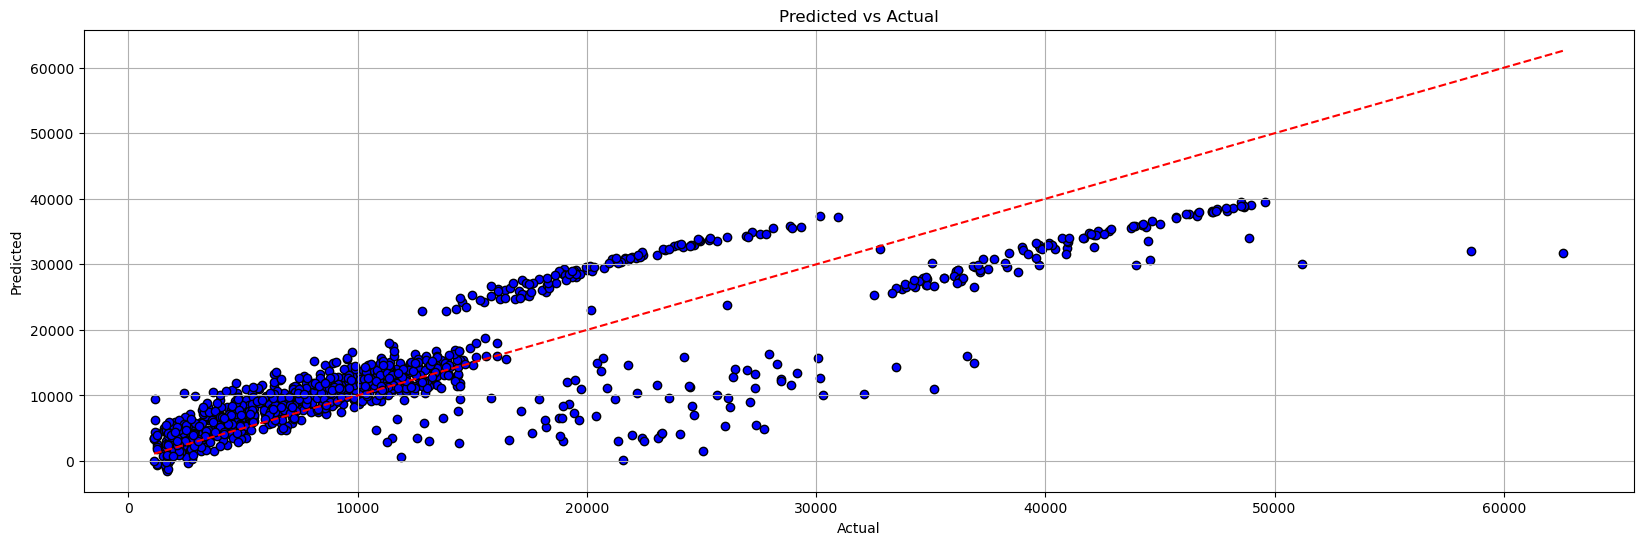

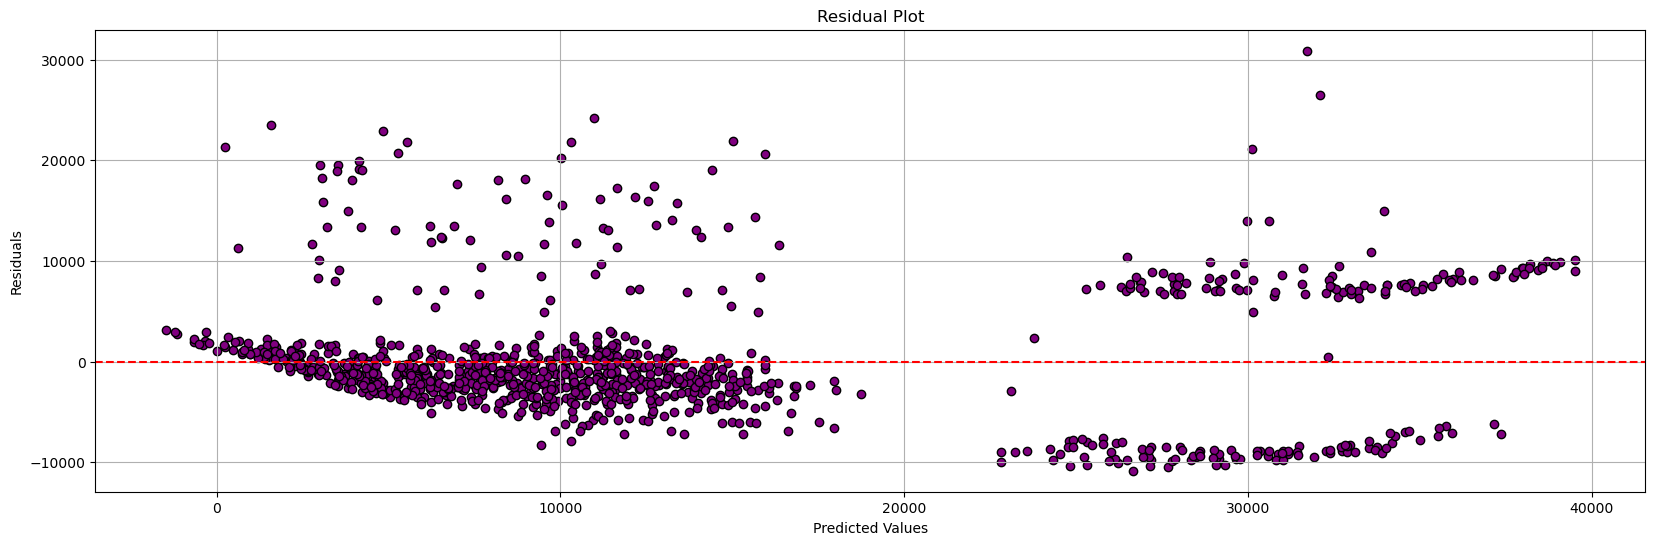

array([-10835.01733209,    245.43393807,  22812.66419683,    314.66191785,
         -789.38960041,    530.94330726,    -82.87105826,   -383.15017999,
         -639.53916541])

In [39]:
lembda=  np.logspace(-4,3, 9000) 
ridge_model(data ,X_train , y_train , X_test, y_test, lembda)

Best Lambda Value: 3.0000

Lasso Results:
Train RSS: 39531621921.20
Test RSS: 9514034491.67
Estimated Variance σ²: 37293982.94
Mallow's Cp: 37538190.50
AIC: 37538190.50
BIC: 38926539.48
Train MSE: 36980001.80
Test MSE: 35500128.70
RMSE: 6081.12
R² train: 0.7299
R² test: 0.8068
Adjusted R²: 0.7279


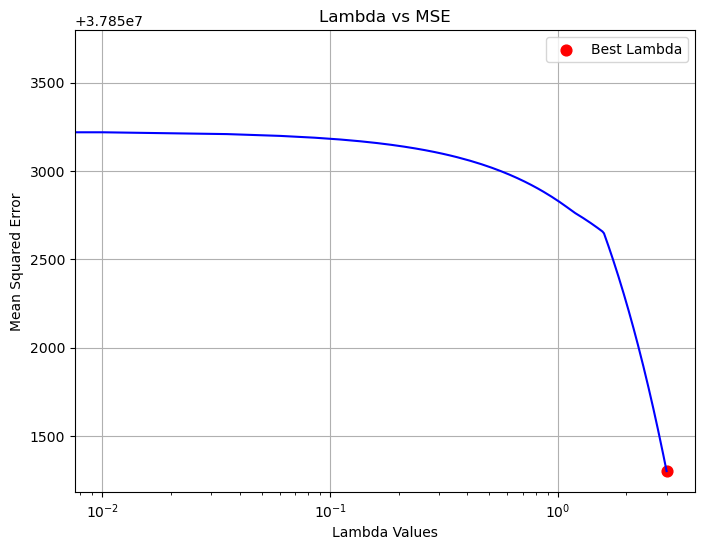

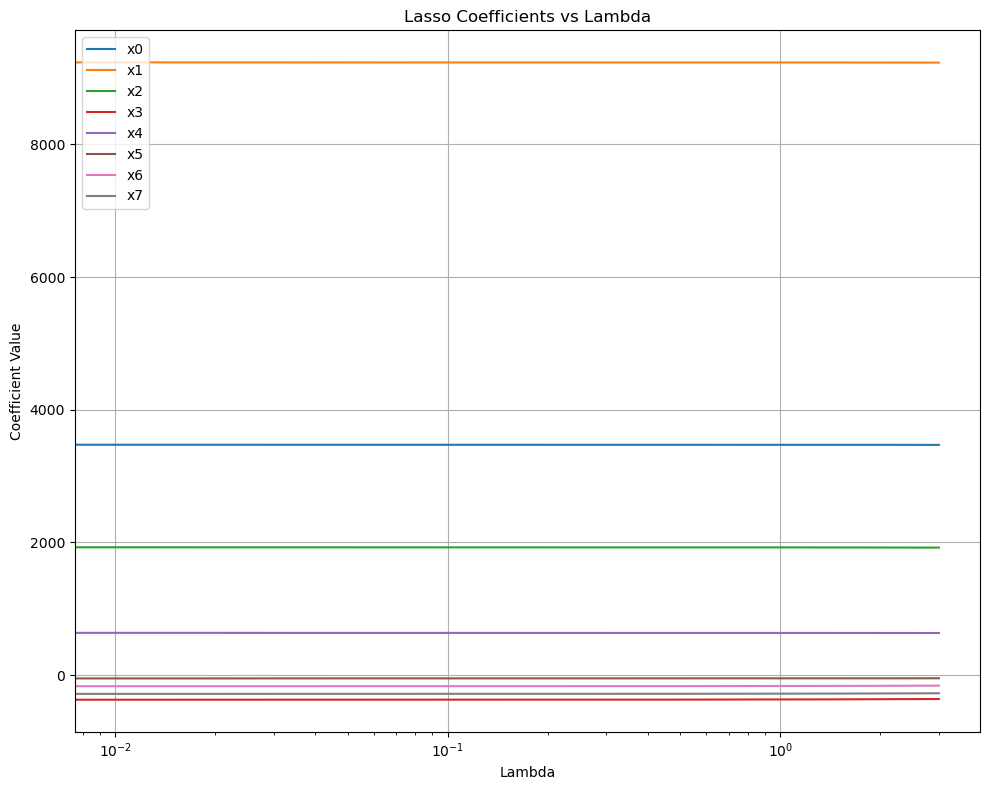

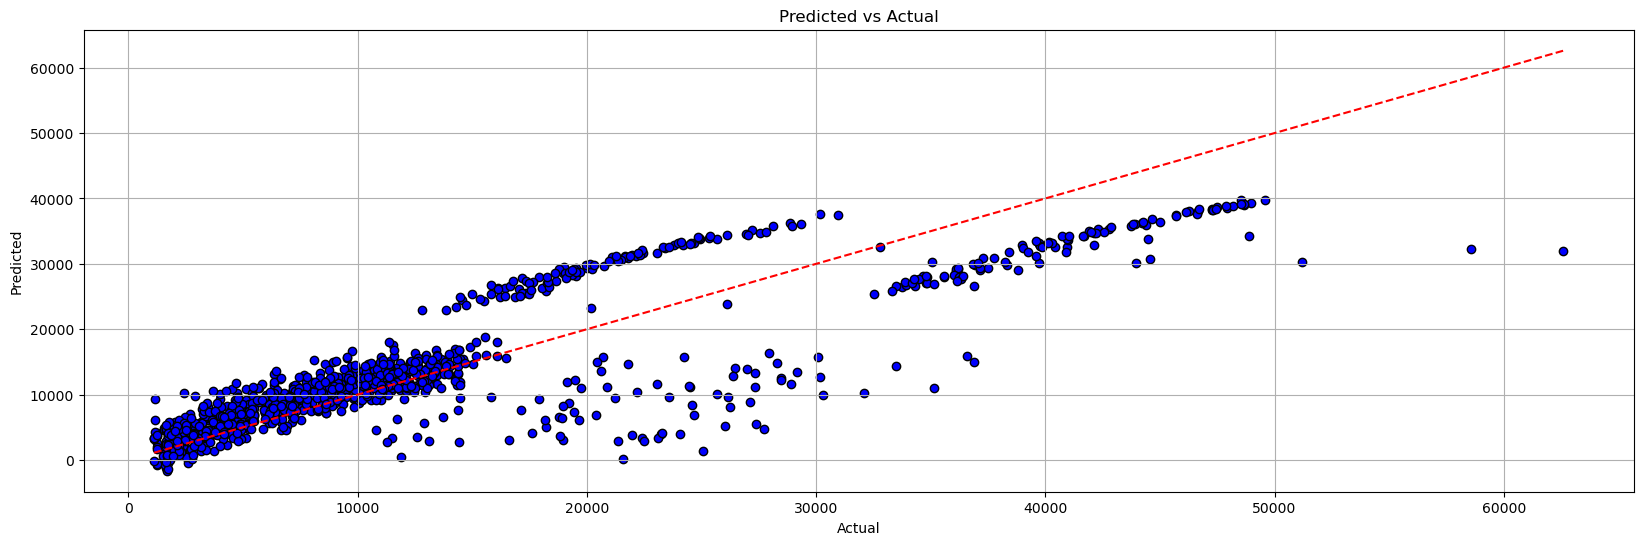

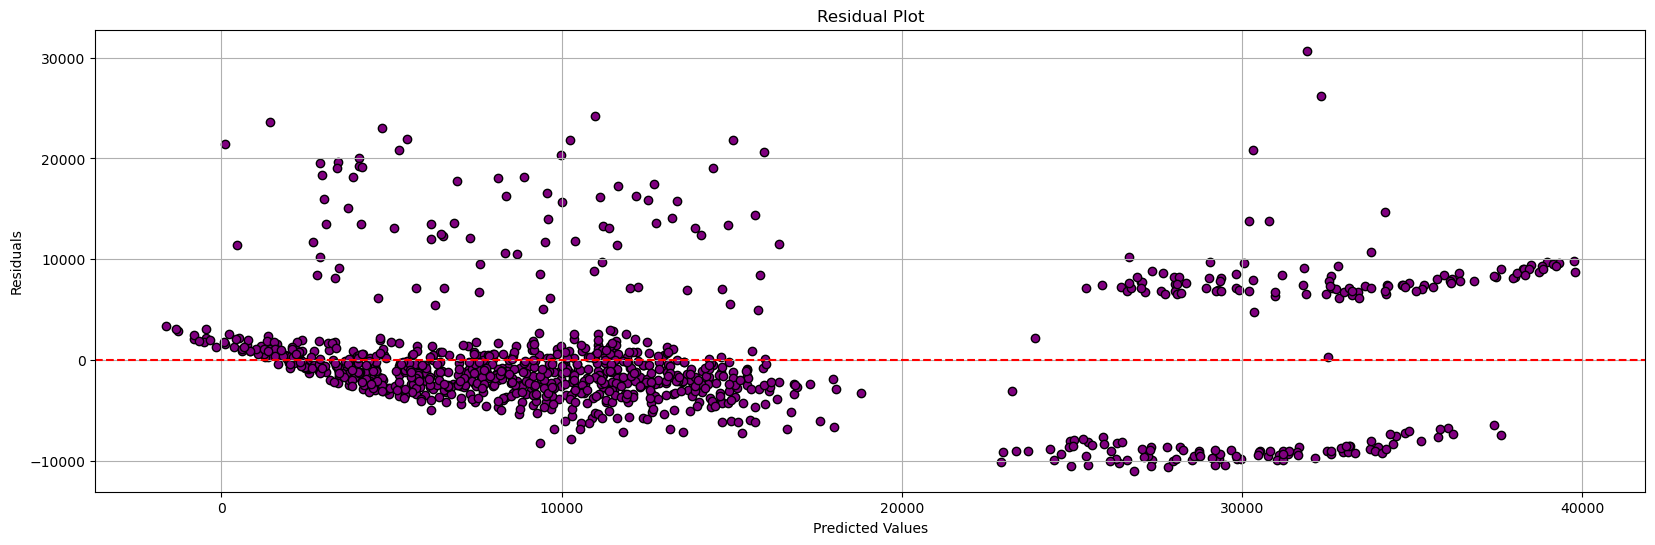

array([-11079.76530814,    248.05195364,  23069.26703319,    317.92005934,
         -813.85702038,    530.72098145,    -94.5454456 ,   -369.94459081,
         -636.28082291])

In [40]:
lmda = np.linspace(-2,3,200)
lasso(X, y, lmda)


Final Model Evaluation Report
───────────────────────────────────
Best Alpha    : 0.0000
Train MSE     : 43870165.2686
Test MSE      : 48514402.9946
Train R² Score: 0.6796
Test R² Score : 0.7360
 Adjusted R^2 : 0.6772


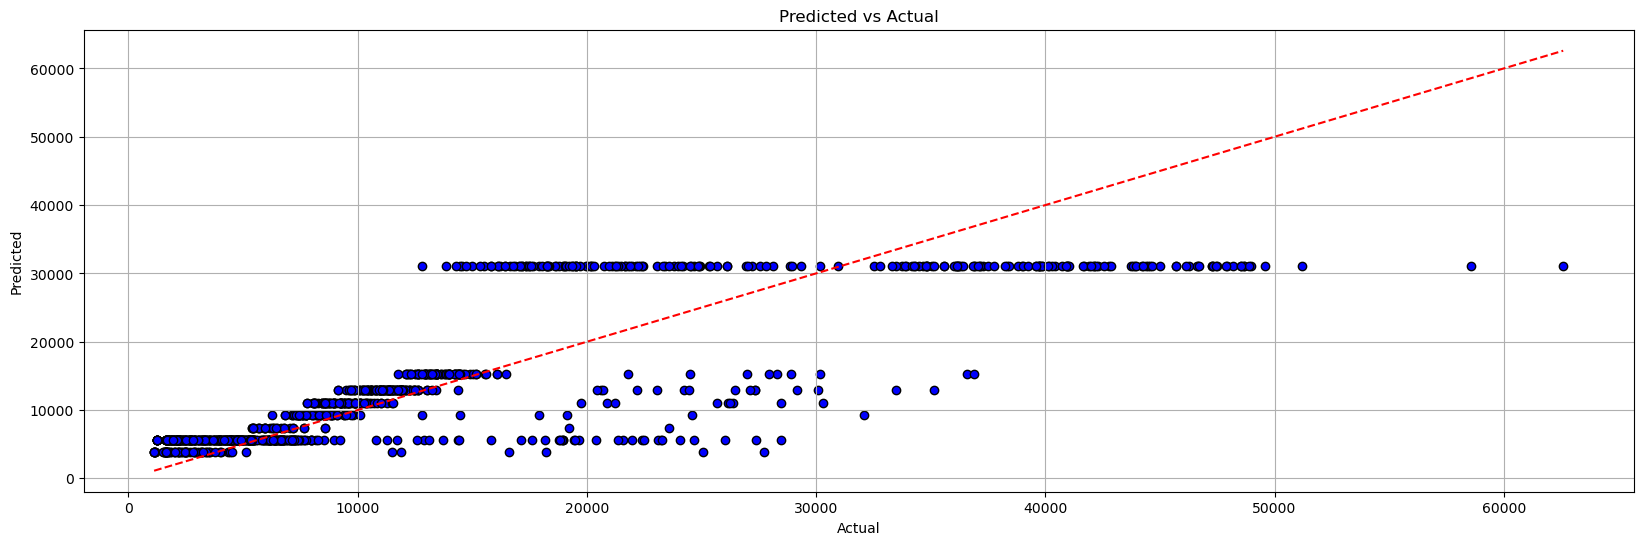

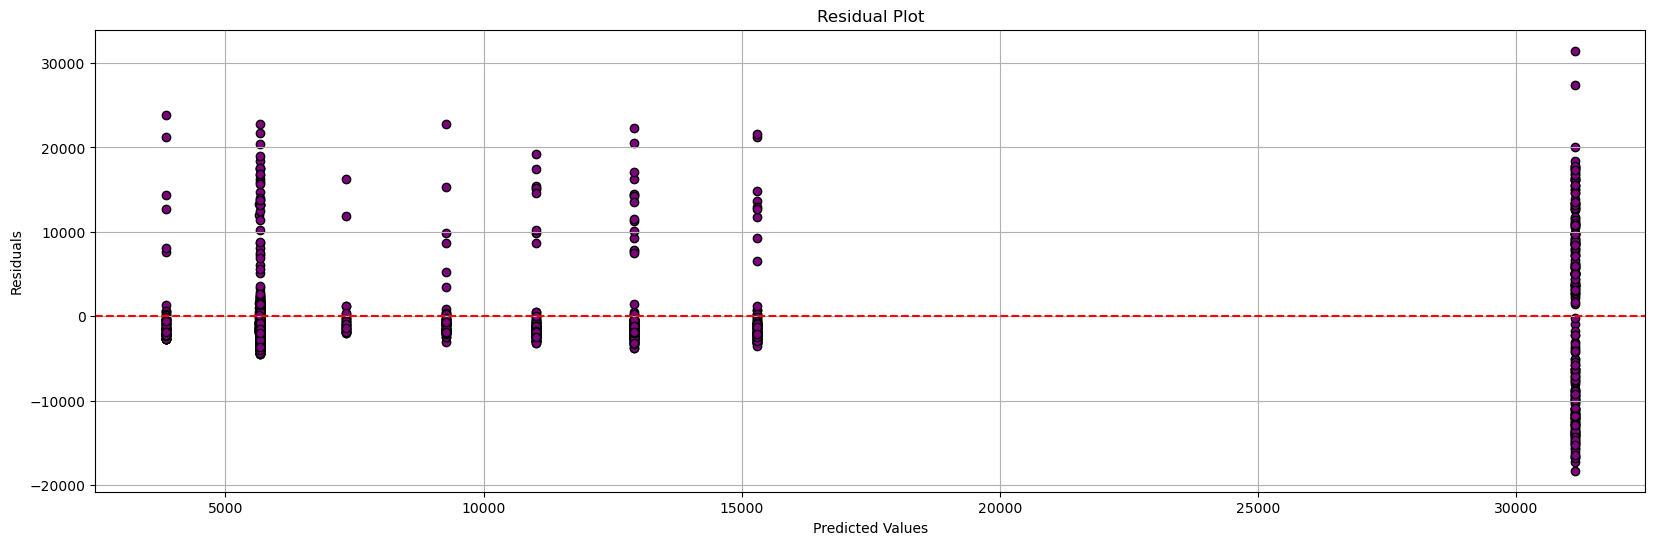

In [41]:
## Regression Tree :
tree_model(X,y)

NaN in x: 0
NaN in y: 0

=== Random Forest Results ===
Trees: 100, Features: 8
Train MSE: 34781041.1042, Test MSE: 33914211.8300
Train R²: 0.7460, Test R²: 0.8154
Adjusted R²: 0.7440


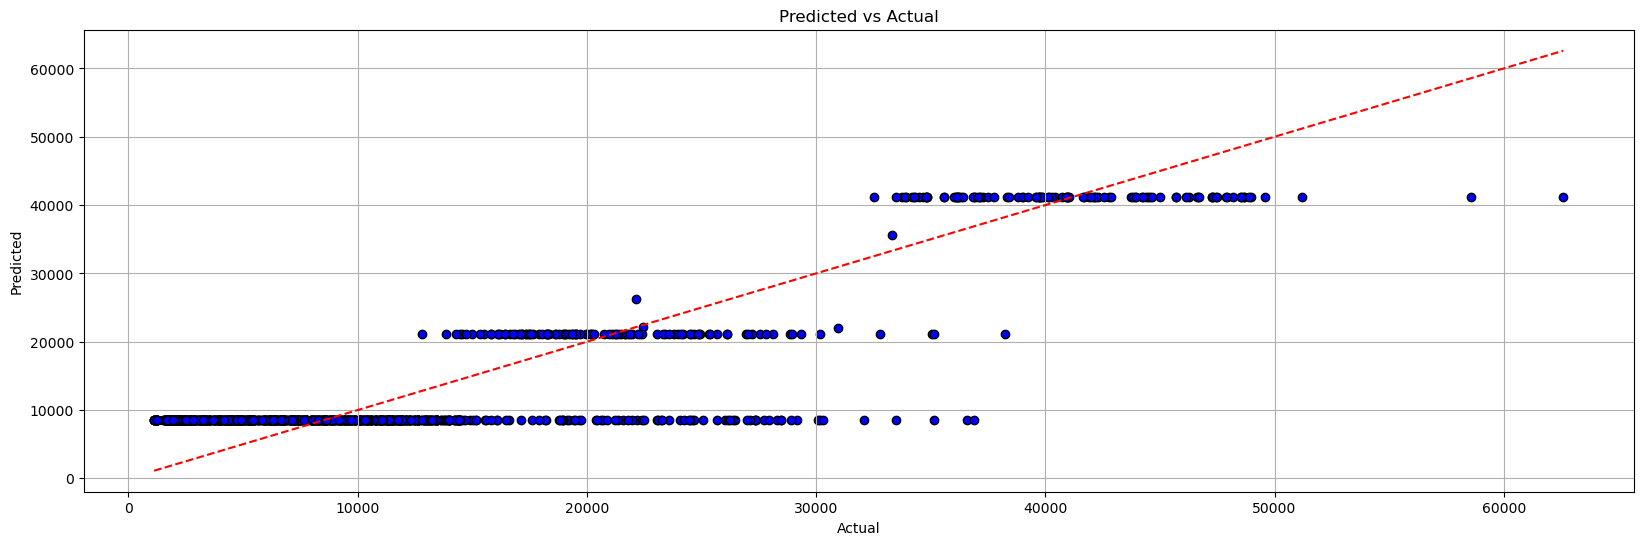

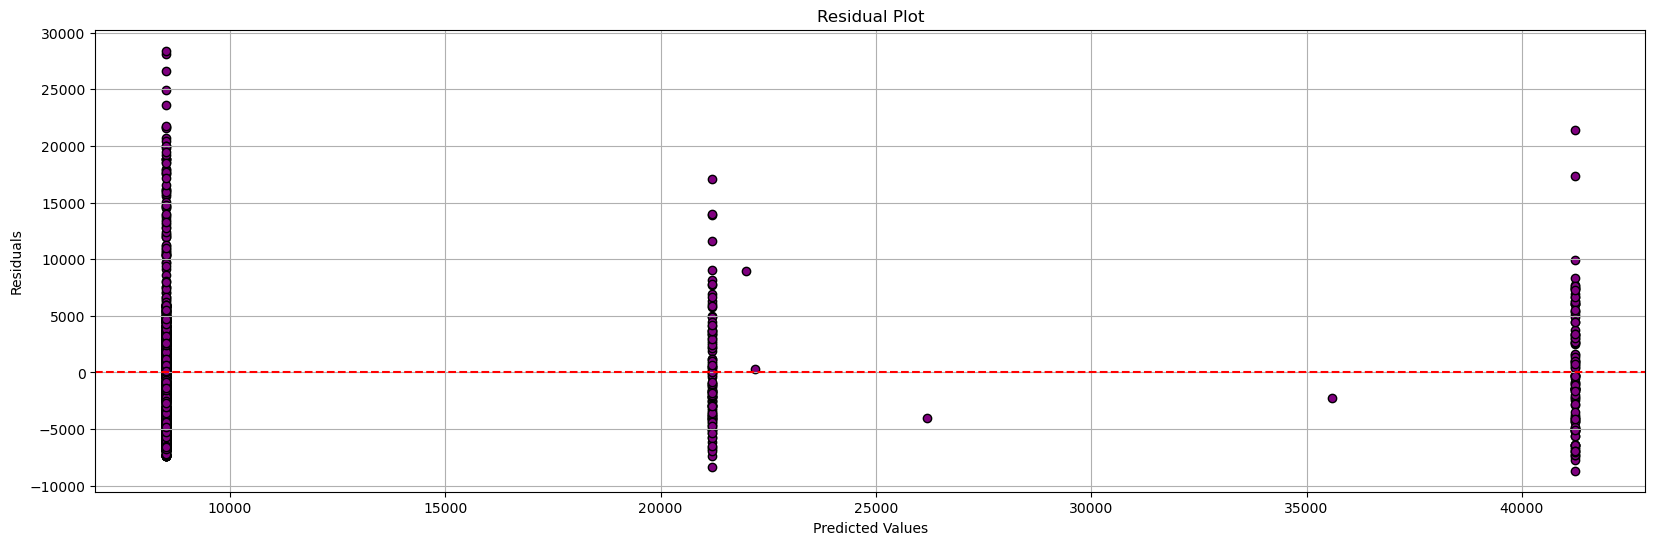

{'model': 'random_forest',
 'train_mse': 34781041.10419968,
 'test_mse': 33914211.83004517,
 'train_r2': 0.7459655632684321,
 'test_r2': 0.8154389515958513,
 'adj_r2': 0.7440483222364958}

In [44]:
y_r = data['charges']
x_r = data[selected_features]


# If NaN exist, clean again (example):
x_r = x_r.fillna(x_r.mean())
y_r = y_r.fillna(y_r.mean())




random_forest(x_r, y_r, 100)

In [45]:
result = xgboost_regressor(X_train, y_train, X_test,y_test, n_estimators = 500, learning_rate= 0.01 , max_depth = 3)


Final Train MSE: 19148370.1859
Final Test MSE:  19505250.5691
Final Train R²:  0.8601
Final Test R²:   0.8939
Train Adj R²:    0.8591
Test Adj R²:     0.8906


In [46]:

# import sys
# !{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor



models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}
    print(f"{name} => R2: {r2:.4f}, MSE: {mse:.4f}")

model = BayesianRidge()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)

print("Bayesian Inbuilt (no interaction)")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

# Custom Bayesian model (optional)
# sigma2 = 0.01
# tau2 = 1
# y_pred_bayes = bayesian_predict(X_train, y_train, X_test, sigma2, tau2)
# r2_bayes = r2_score(y_test, y_pred_bayes)
# mse_bayes = mean_squared_error(y_test, y_pred_bayes)
# results['Bayesian Linear'] = {'R2': r2_bayes, 'MSE': mse_bayes}
# print(f"Bayesian Linear => R2: {r2_bayes:.4f}, MSE: {mse_bayes:.4f}")


OLS => R2: 0.8069, MSE: 35478020.6752
Ridge => R2: 0.8060, MSE: 35656880.9991
Lasso => R2: 0.8069, MSE: 35478150.0975
Decision Tree => R2: 0.8941, MSE: 19461664.3168
Random Forest => R2: 0.9018, MSE: 18051592.6457
XGBoost => R2: 0.8948, MSE: 19332898.3398
Bayesian Inbuilt (no interaction)
Train R²: 0.7299, Test R²: 0.8064
Train MSE: 36980791.6287, Test MSE: 35577680.5899


 Skewness & Kurtosis of features:
age                  | Skew: 0.05 | Kurtosis: -1.24


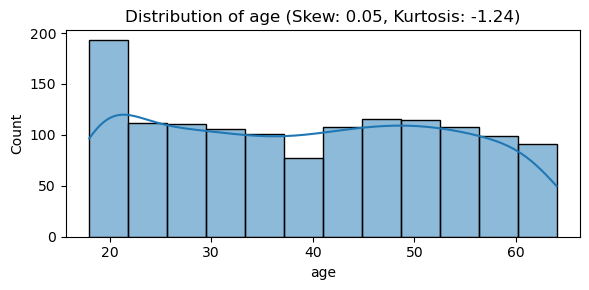

bmi                  | Skew: 0.28 | Kurtosis: -0.06


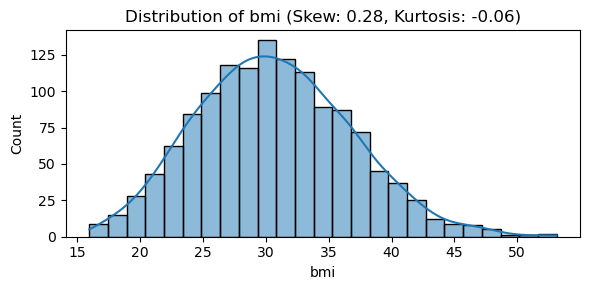

children             | Skew: 0.94 | Kurtosis: 0.20


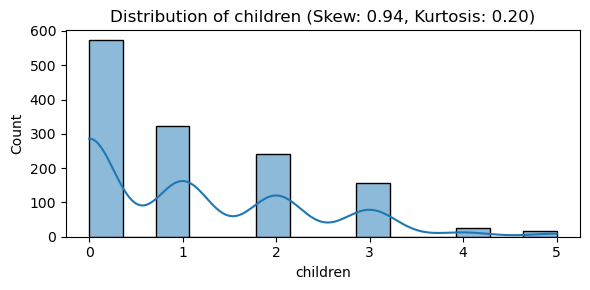

sex_male             | Skew: -0.02 | Kurtosis: -2.00


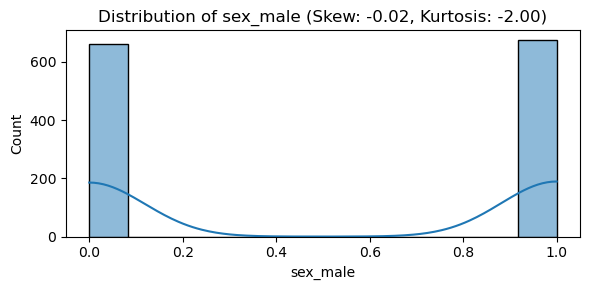

smoker_yes           | Skew: 1.46 | Kurtosis: 0.14


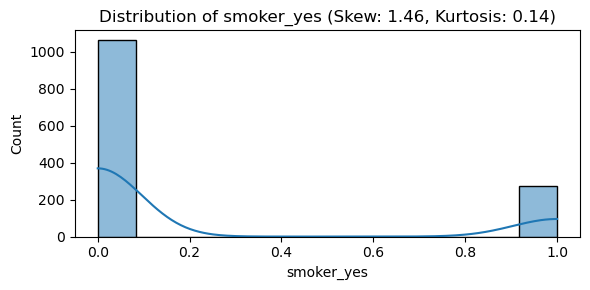

region_northwest     | Skew: 1.20 | Kurtosis: -0.55


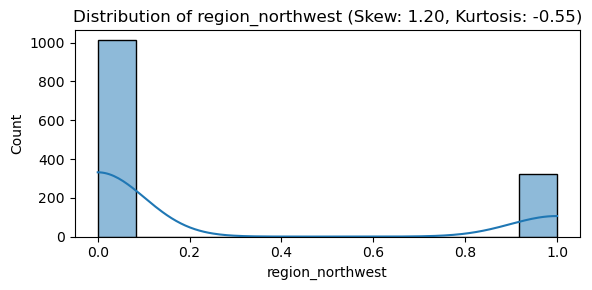

region_southeast     | Skew: 1.02 | Kurtosis: -0.95


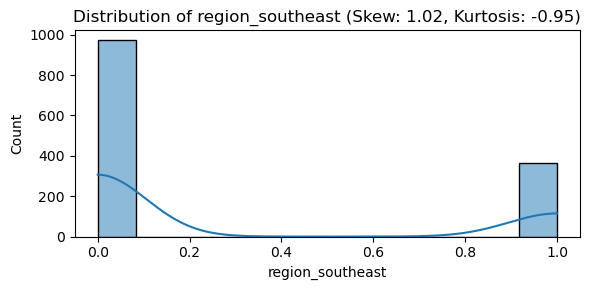

region_southwest     | Skew: 1.20 | Kurtosis: -0.57


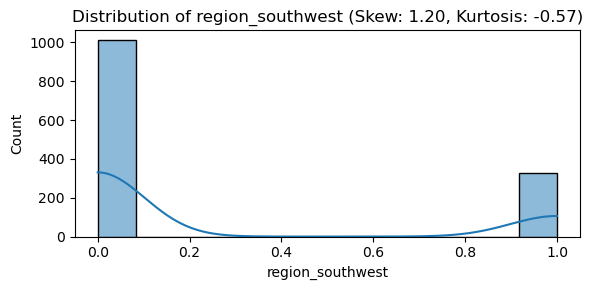

smoker_bmi           | Skew: 1.65 | Kurtosis: 1.04


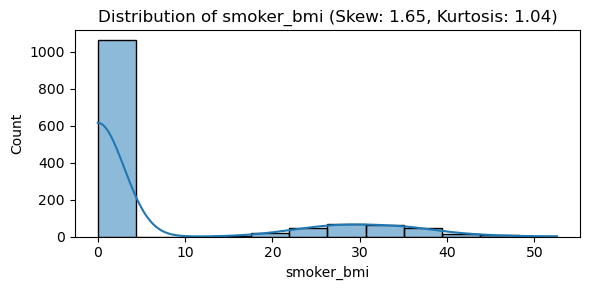

age_smoker           | Skew: 1.95 | Kurtosis: 2.45


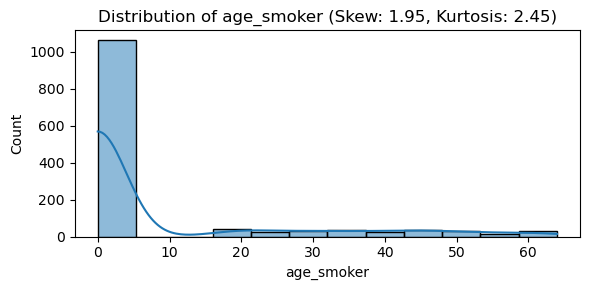

age_bmi              | Skew: 0.48 | Kurtosis: -0.53


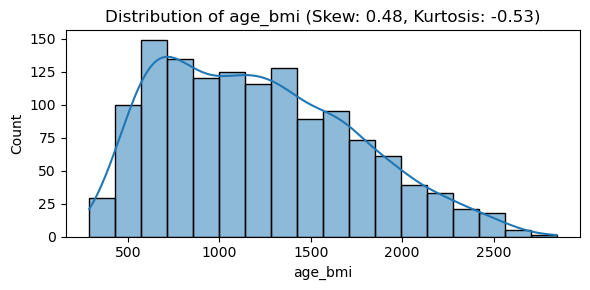

children_bmi         | Skew: 1.11 | Kurtosis: 0.98


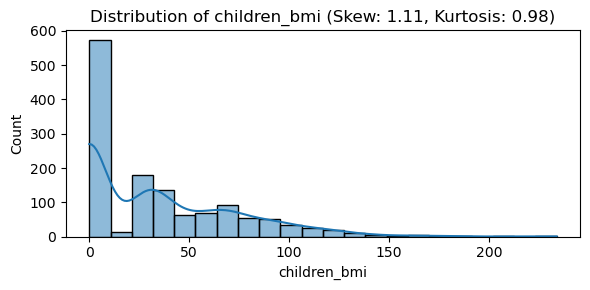

smoker_southeast     | Skew: 3.43 | Kurtosis: 9.77


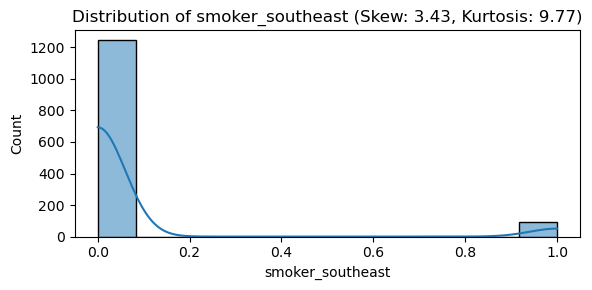

age_male             | Skew: 0.55 | Kurtosis: -1.22


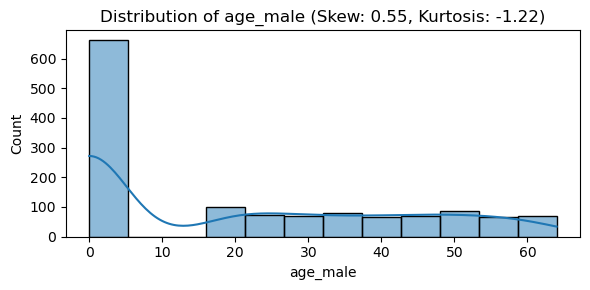


 Relationship with Target (charges):


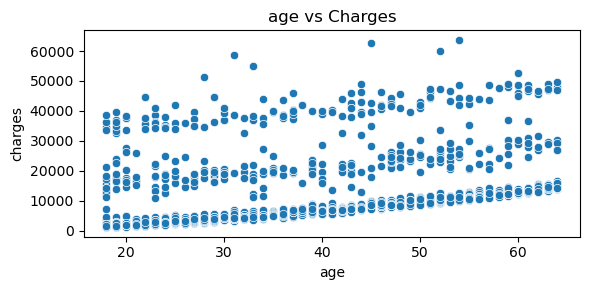

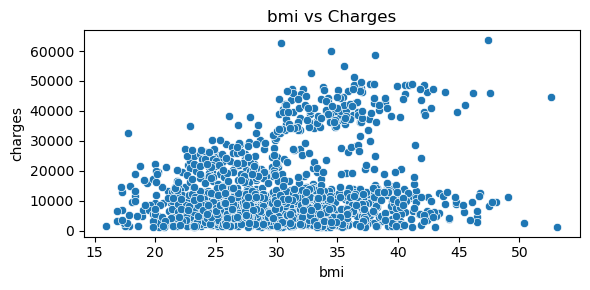

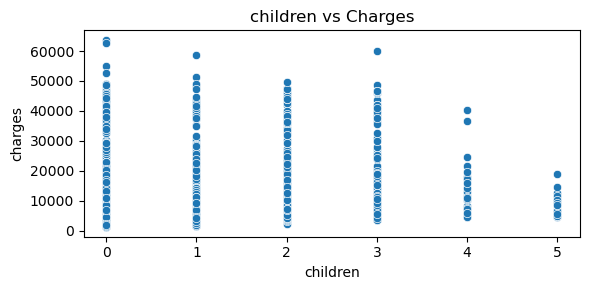

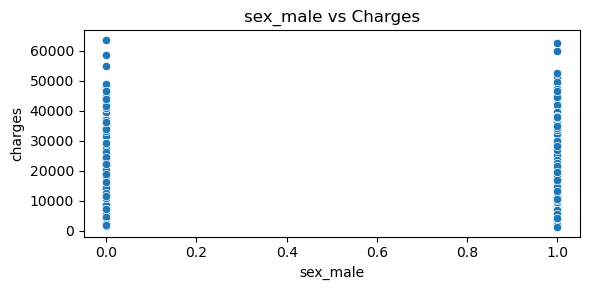

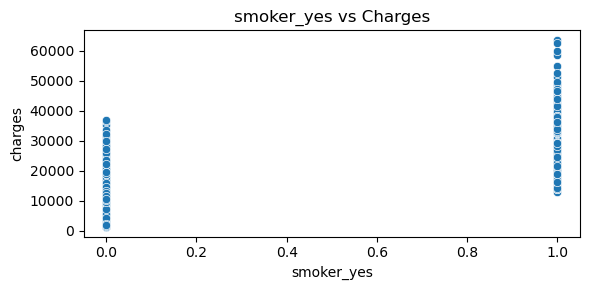

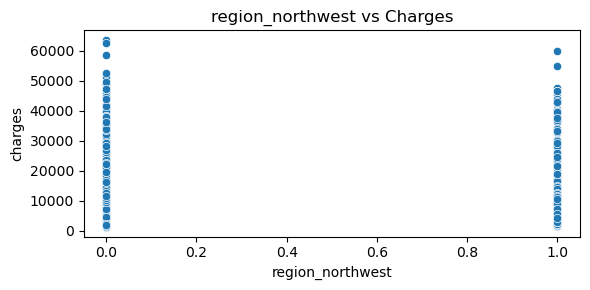

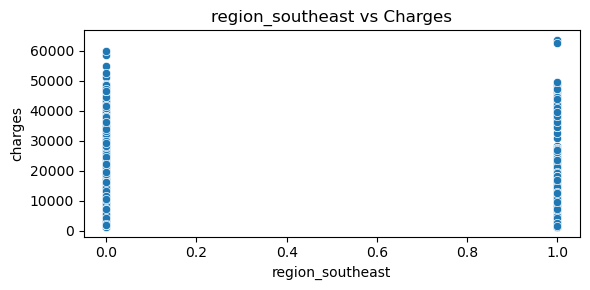

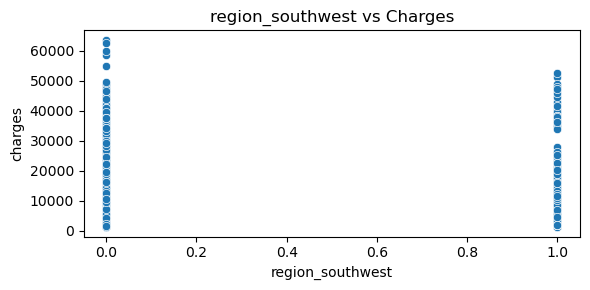

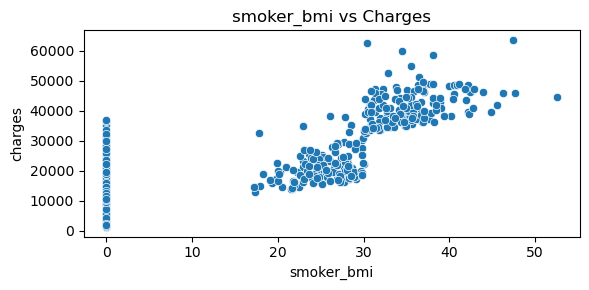

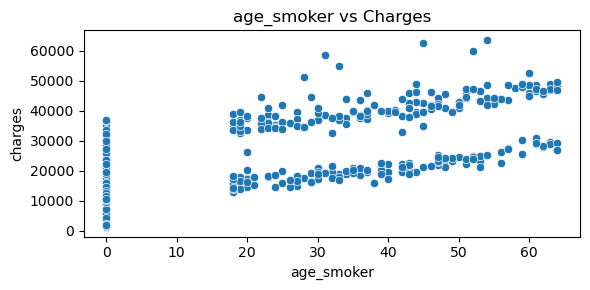

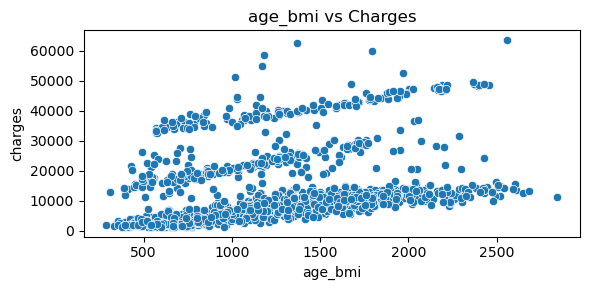

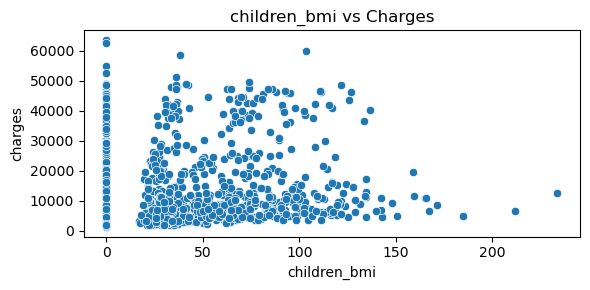

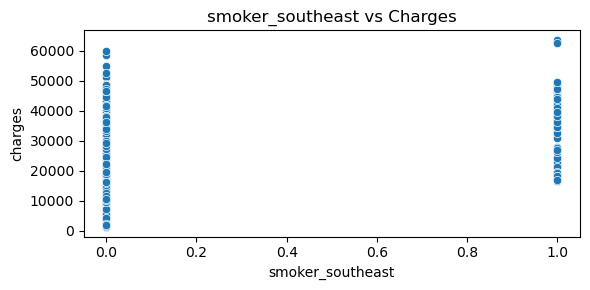

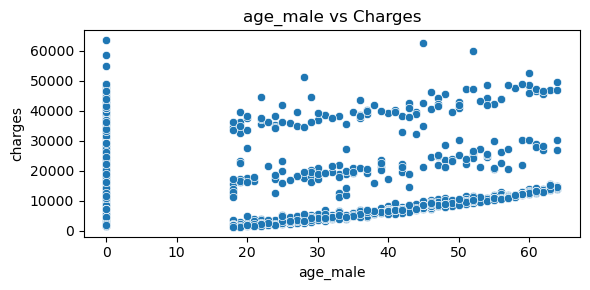

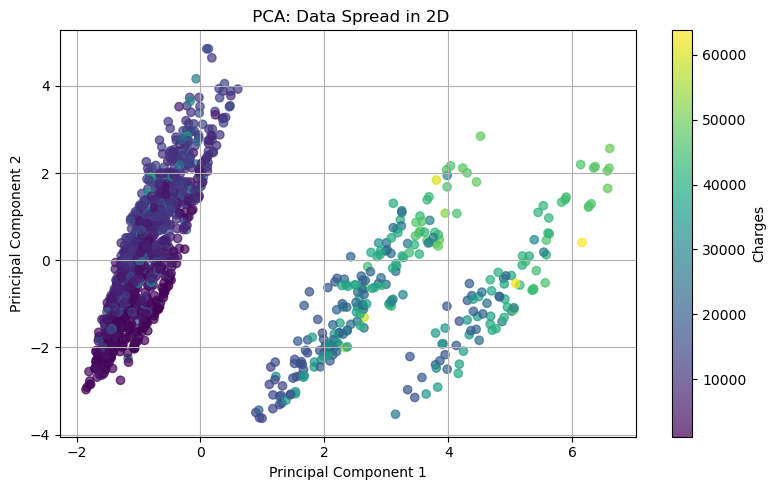

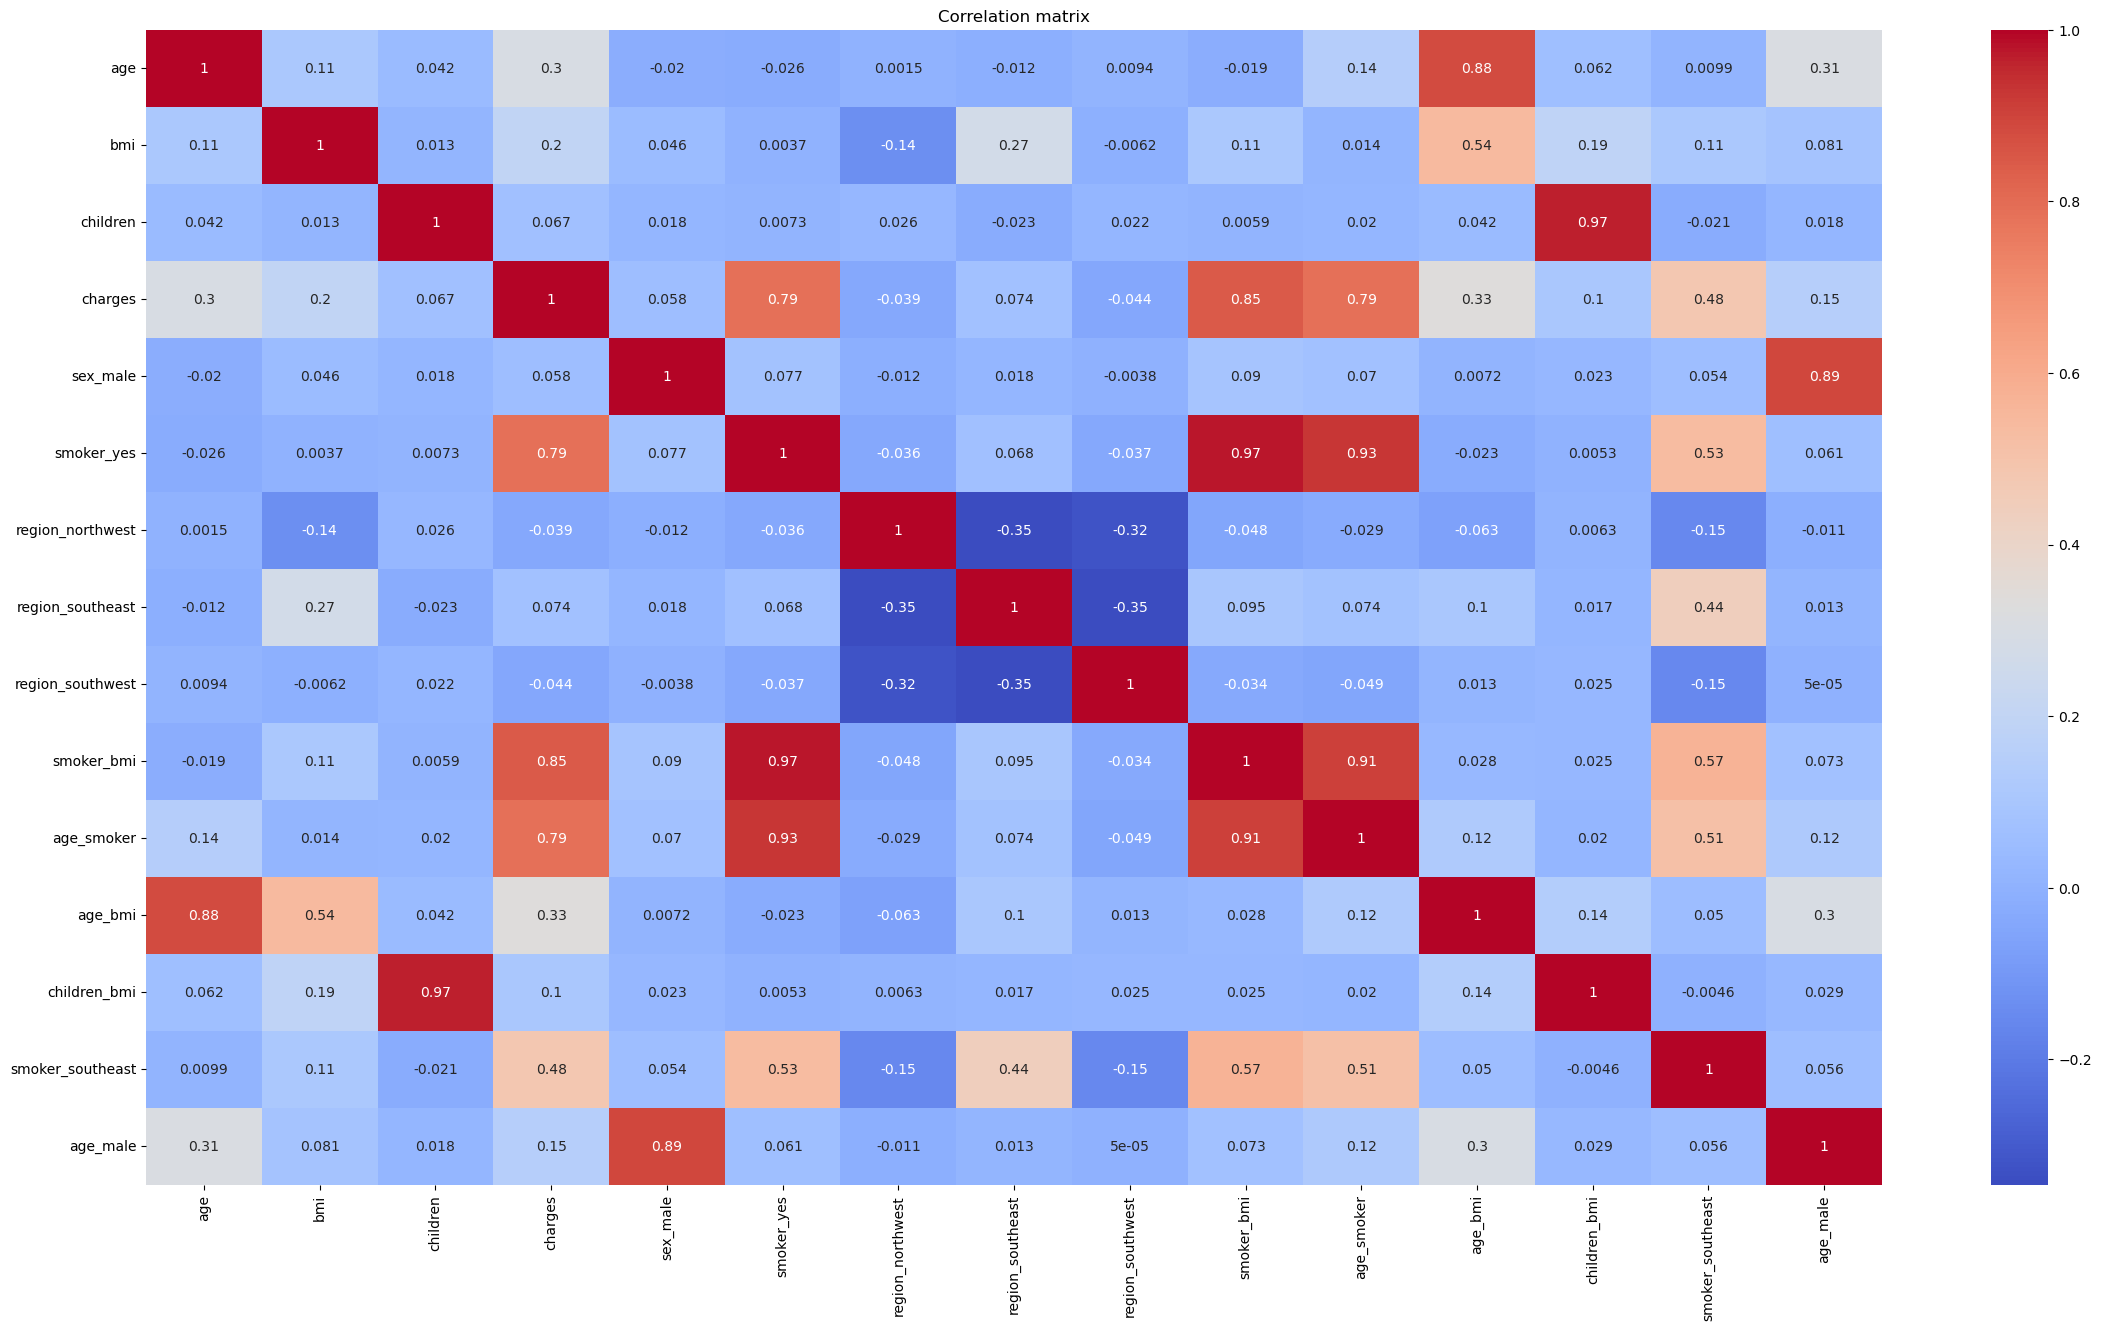

In [47]:
# Effective interaction terms for insurance charges prediction
data['smoker_bmi'] = data['smoker_yes'] * data['bmi']
data['age_smoker'] = data['age'] * data['smoker_yes']
data['age_bmi'] = data['age'] * data['bmi']
data['children_bmi'] = data['children'] * data['bmi']
data['smoker_southeast'] = data['smoker_yes'] * data['region_southeast']
data['age_male'] = data['age'] * data['sex_male']


# Features & Target
X = data.drop('charges', axis=1)
y = data['charges']

data_plot(data, X, y)

selected_features = ['age', 'smoker_yes', 'bmi', 'region_southeast' , 'children' , 'sex_male' , 'region_northwest' , 'region_southwest' ]
X = data[selected_features].values
y = data['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




--- Train Evaluation ---


Residual Standard Error (RSE): 6106.868334572685
R-squared: 0.7299057809339075
Correlation between actual and predicted: 0.85434523521461
R-squared vs. Correlation squared: 0.7299057809339075 vs 0.7299057809339073
H1: F-statistic = 358.06955183323265 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 6058.947734426037
R-squared: 0.8069287081198009
Correlation between actual and predicted: 0.9064671043724966
R-squared vs. Correlation squared: 0.8069287081198009 vs 0.8216826113094585


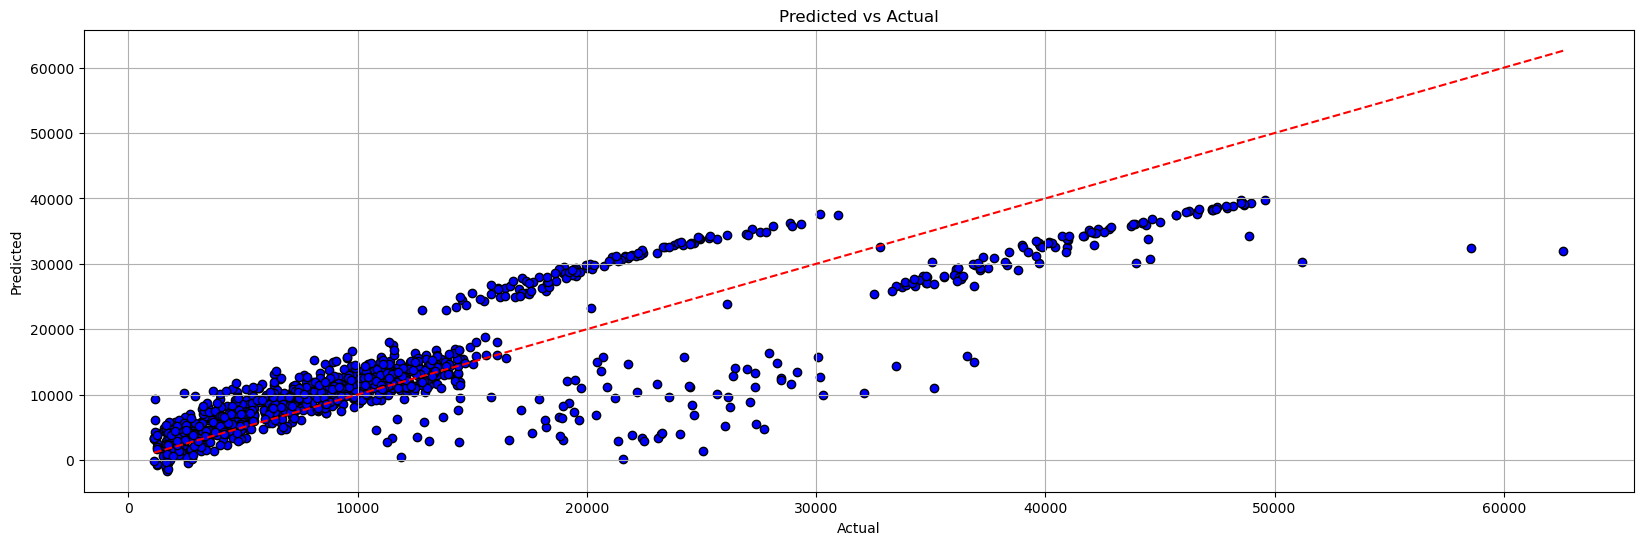

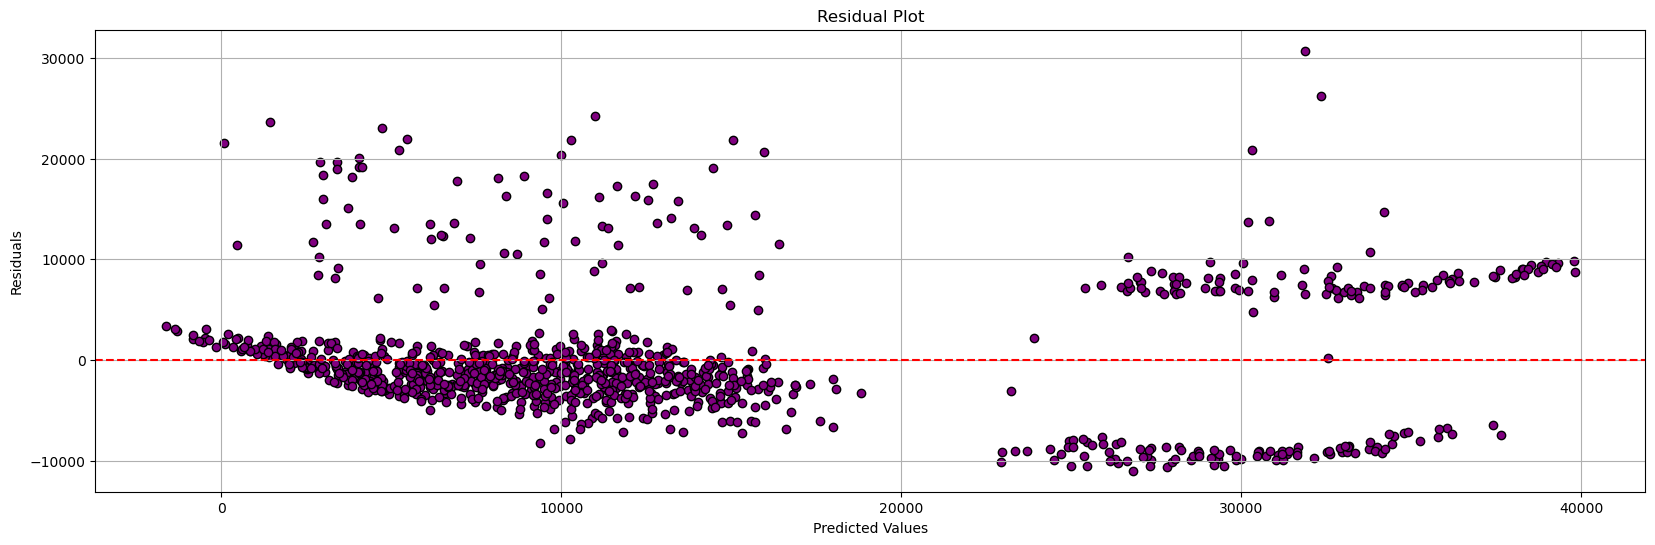

In [48]:
traina_result = run_multiple_linear_regression(X_train, y_train,X_test, y_test, feature_names=selected_features)



--- Training Results (Bayesian Linear Regression) ---
Train MSE: 40437319.6387
Train R² : 0.7047


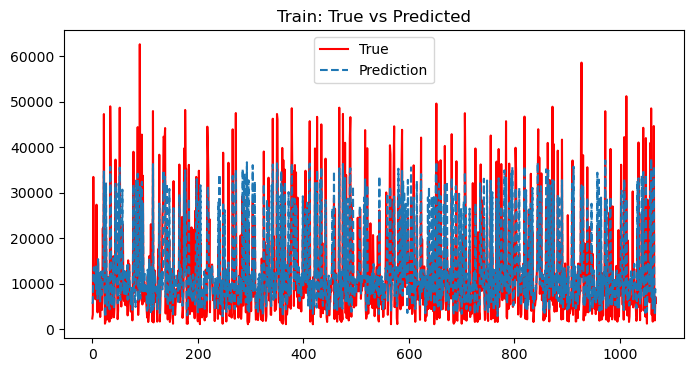


--- Testing Results (Bayesian Linear Regression) ---
Test MSE : 41737800.0731
Test R²  : 0.7729


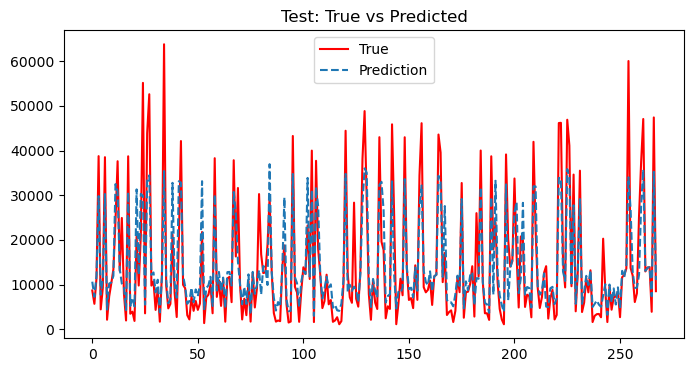

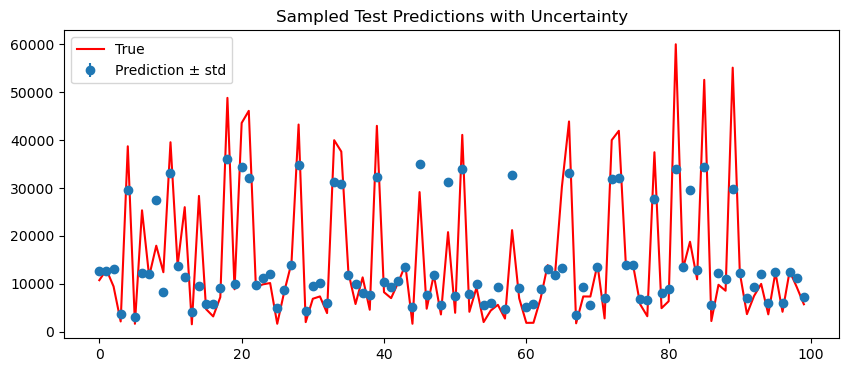

In [49]:
# 1. Train model
mu_post, Sigma_post = train_bayesian_linear_regression(X_train, y_train)
# 2. Evaluate on test data
test_bayesian_linear_regression(X_test, y_test, mu_post, Sigma_post)


The best lambda is : 11.9646
Final training MSE is : 36992853.1426

Train R^2 : 0.7298
Train MSE : 36992853.1426
Adjusted R^2 is : 0.7278
AIC is : 18644.6455
BIC is : 18684.4414
 Test R2: 0.8046
 Test MSE: 35899528.3255


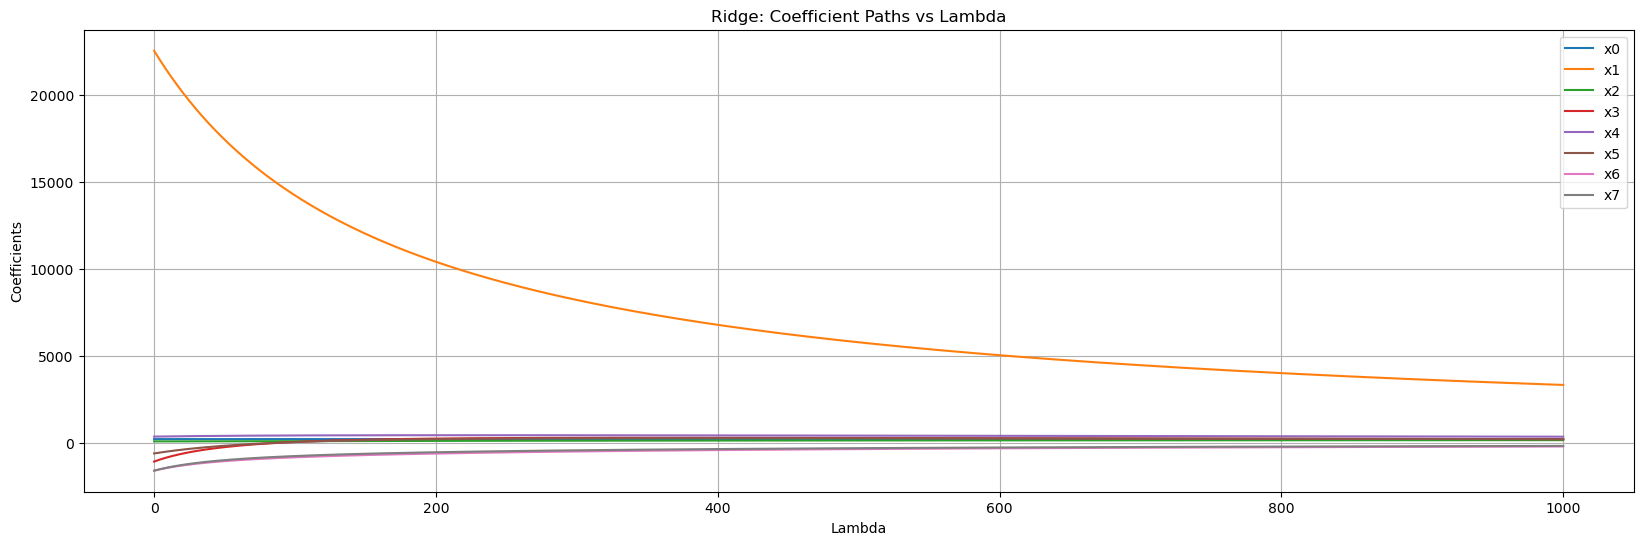

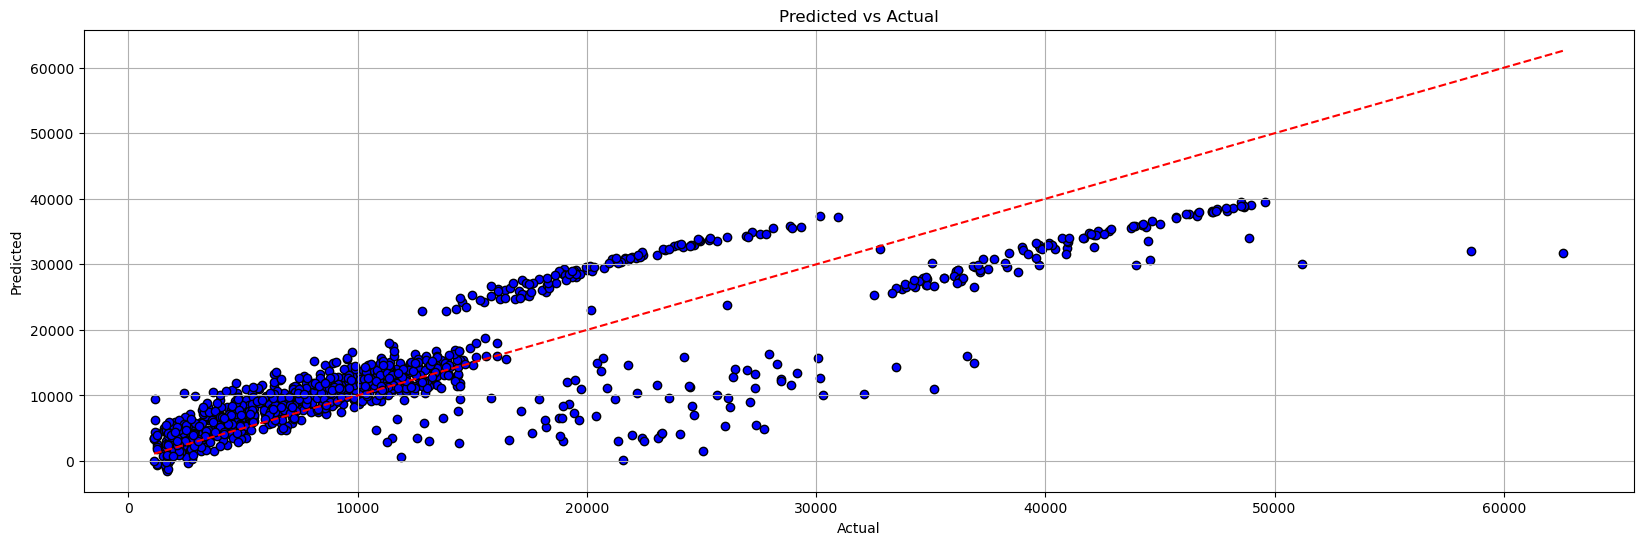

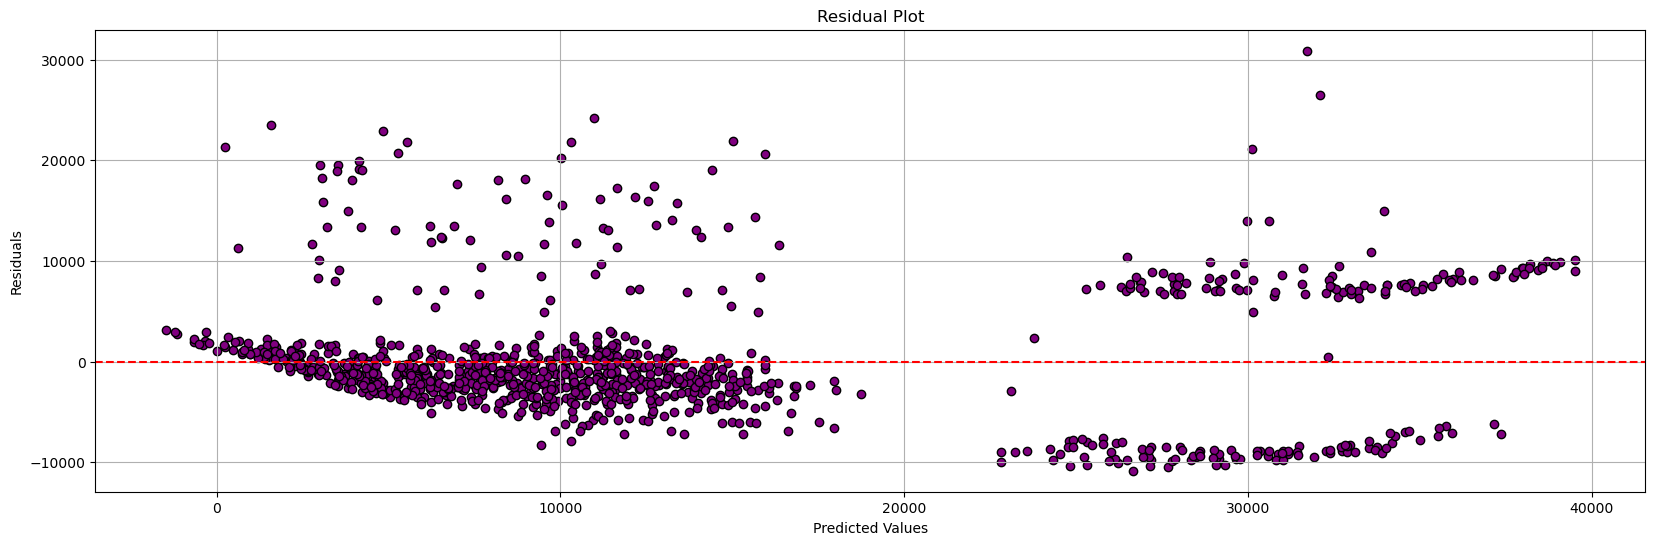

array([-10835.01733209,    245.43393807,  22812.66419683,    314.66191785,
         -789.38960041,    530.94330726,    -82.87105826,   -383.15017999,
         -639.53916541])

In [50]:
lembda=  np.logspace(-4,3, 9000) 
ridge_model(data ,X_train , y_train , X_test, y_test, lembda)

Best Lambda Value: 3.0000

Lasso Results:
Train RSS: 39531621921.20
Test RSS: 9514034491.67
Estimated Variance σ²: 37293982.94
Mallow's Cp: 37538190.50
AIC: 37538190.50
BIC: 38926539.48
Train MSE: 36980001.80
Test MSE: 35500128.70
RMSE: 6081.12
R² train: 0.7299
R² test: 0.8068
Adjusted R²: 0.7279


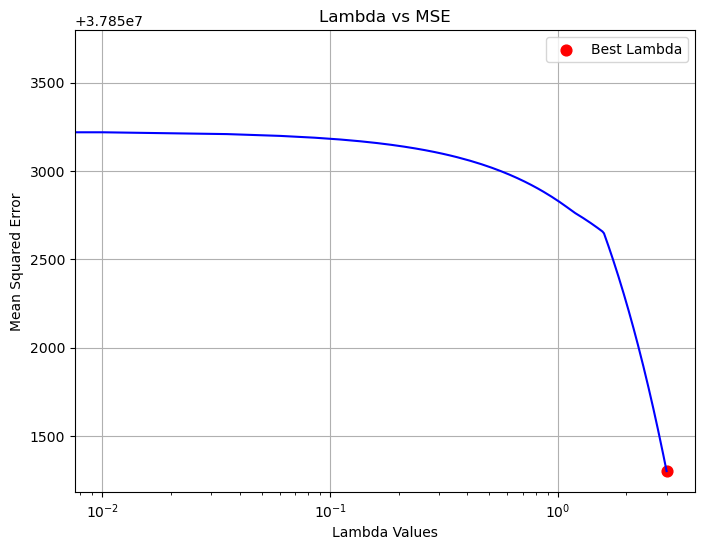

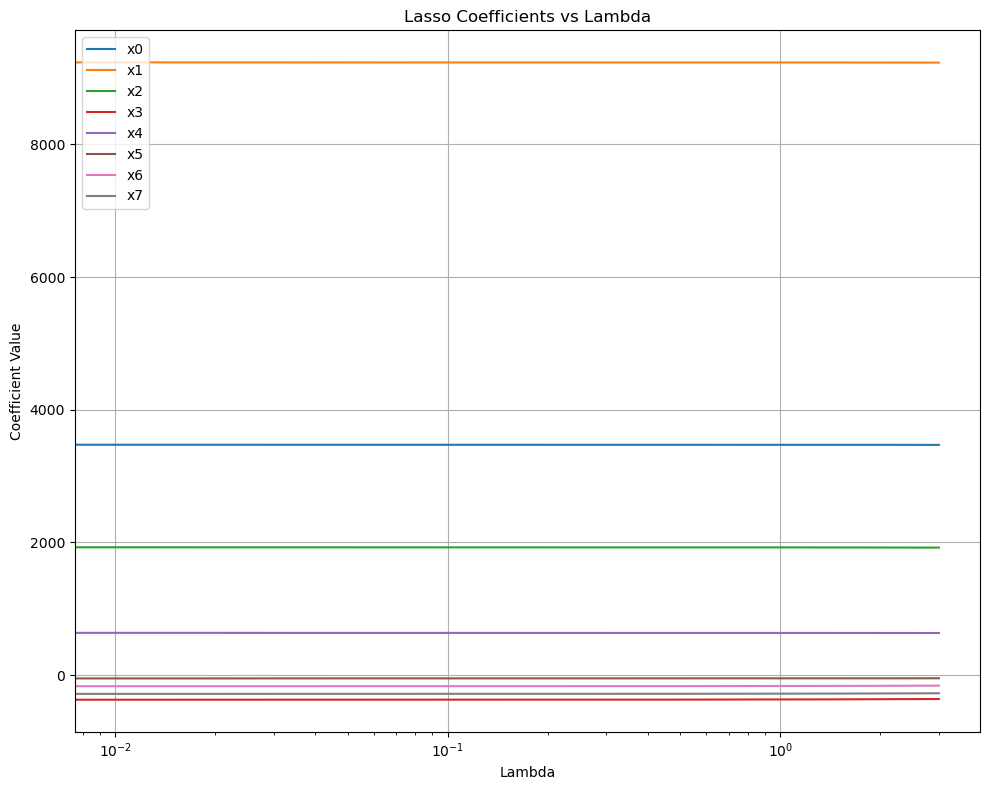

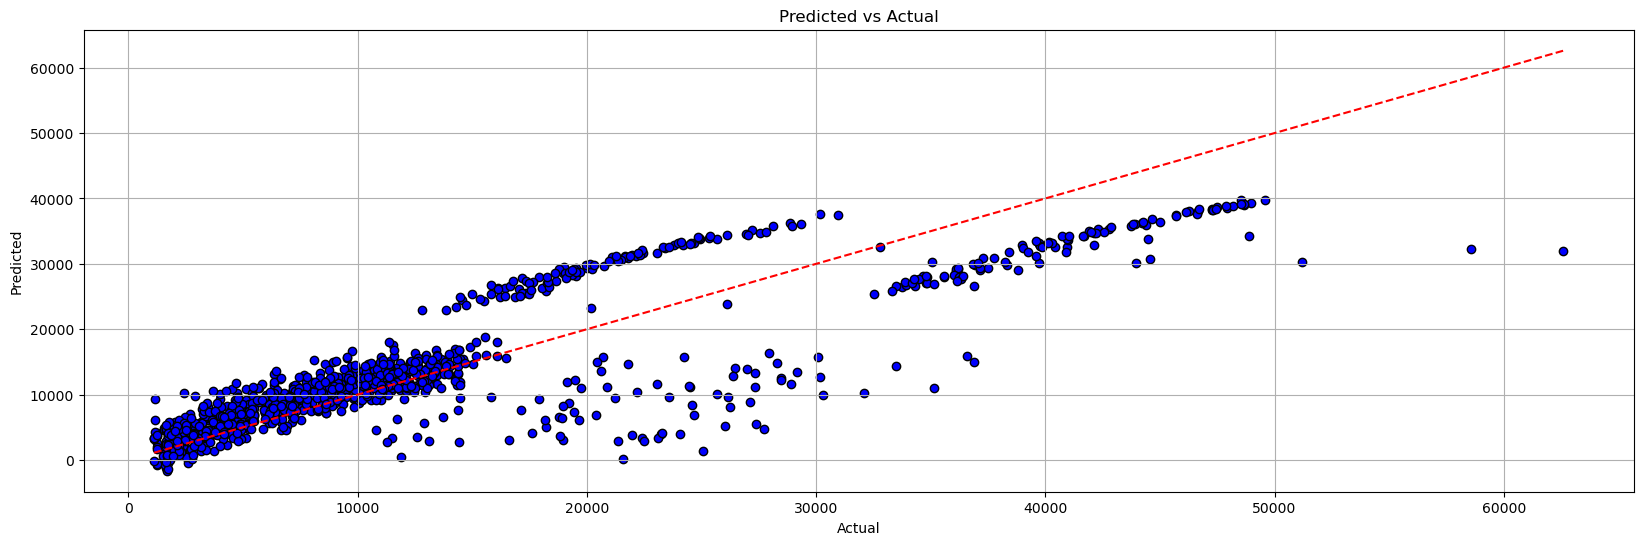

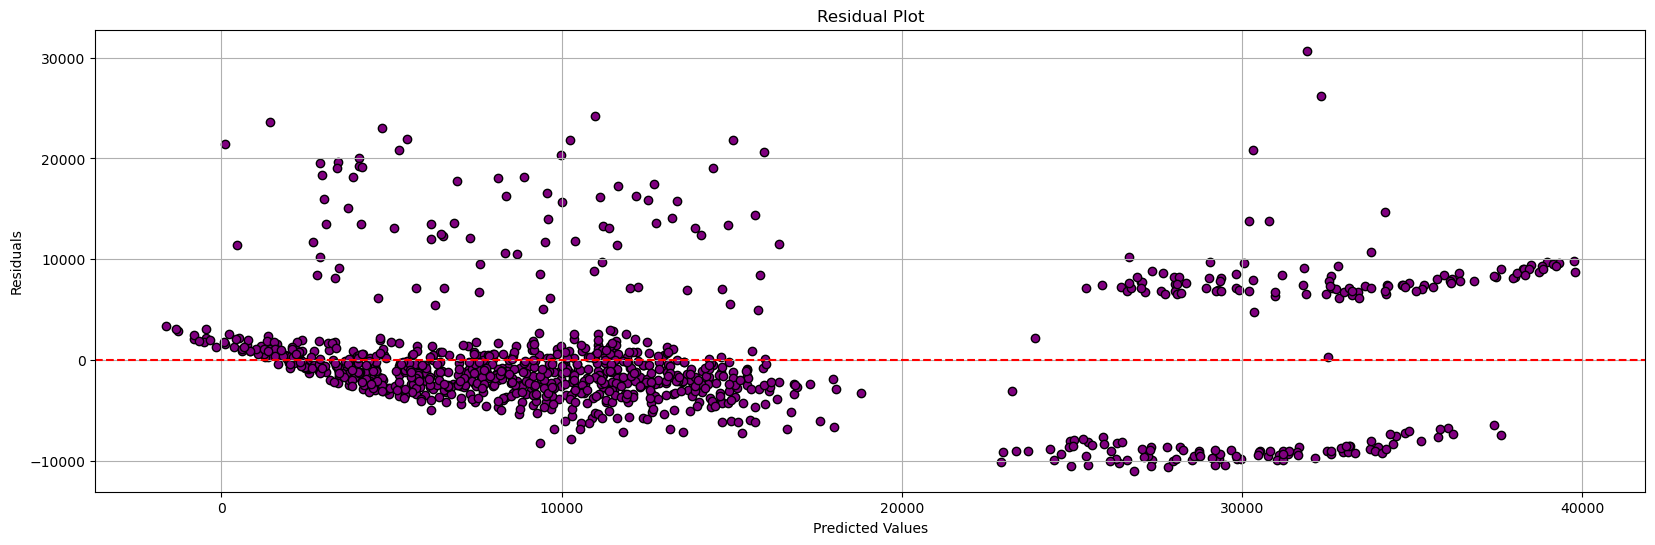

array([-11079.76530814,    248.05195364,  23069.26703319,    317.92005934,
         -813.85702038,    530.72098145,    -94.5454456 ,   -369.94459081,
         -636.28082291])

In [51]:
lmda = np.linspace(-2,3,200)
lasso(X, y, lmda)